# # NBA player Cluster analysis #<br />

# #Contents

# 1. Introduction
## 1) 농구의 포지션 이란? 스탯?
### - 포지션
### - 스탯
## 2) Motivation
## 3) 데이터 수집 및 전처리<br />
# 2. Model setup
## 1) 차원 축소 : LDA
## 2) Classfication 모델 선택
### (1) kmeans(kmeans++)
### (2) heirarchical clustering
### (3) EM clustering
### (4) 가장 결과가 좋은 것? kmeans++
## 3)  클러스터 분석<br />

# 3. Apply basketball analysis by clustering data
## 1) case 1 : Kevin Durant의 role 변화
## 2) case 2 : 농구 흐름에 따른  최근 포지션 수요의 변화
## 3) case 3 : 선수랭크와 포지션조합으로 득점 등급 예측
### (1) 모델의 소개 및 목적
### (2) 데이터 가공
### (3) 딥러닝

# 4. Conclusion & further reserch

# 5. References<br /><br /><br /><br /><br /><br />

# I. Introduction<br />

## 1) 농구의 포지션 이란? 스탯?

### - 포지션
![position](https://static1.squarespace.com/static/561a6270e4b0cbb5768713d9/t/575ec9db2b8ddeb3fba7d478/1465829885170/Basketball+Positions)<br />

모든 NBA 선수들은 플레이하는 역할에 따른 '포지션'이라는 라벨을 가지고 있다.<br />
 전통적인 포지션은 다음과 같다<br />
  * **포인트 가드(PG)** - 팀의 **사령탑** 역할을 하며 보통 팀에서 가장 **전술적 이해**가 좋은 선수가 맡는다. 
  * **슈팅 가드(SG)** - **3PT** 등 장거리에서 슛을 하여 점수를 얻는 것을 주역할로 한다.
  * **스몰 포워드(SF)** - 점수를 얻는 것을 주된 역할로 한다. 외곽 슛, 속공 및 리바운드 싸움에도 참여할 수 있는 **올라운드 능력**이 요구됨.
  * **파워 포워드(PF)** - 코트 골밑에서 수비, 득점을 주요 역할로 하고 **리바운드**와 **골밑에서의 몸싸움 및 득점 능력** 등 파워풀한 플레이가 요구됨.
  * **센터(C)** - 골밑 중앙에서 활동하는 포지션. 공격에서는 **골밑슛**을 책임지고 수비에서는 가장  **페인트존을 책임지며** 상대의 슛을 블로킹으로 차단하는 역할까지 한다.<br />




### - 스탯
![position](http://cfile24.uf.tistory.com/image/236ADE335980760C33F998)

- 왼쪽 위부터 **리바운드**, **3점슛**, **블로킹**, **스틸**

  -- 리바운드 : 슈팅이 성공하지 못하고 **튕겨 나왔을 때** 잡는 것  
  
  -- 3점슛 : **24피트** 밖에서 던지는 슈팅  
  
  -- 블로킹 : 상대가 슛한 공을 수비가 반칙이 아닌 선에서 **쳐내는 것**  
  
  -- 스틸 : 상대가 가지고 있는 공을 반칙이 아닌 선에서 **가로채는 것**

   **이 밖에도 득점, 어시스트, 슛 성공율, 파울, 자유투 등 다양한 스탯들이 존재**

## 2) Motivation

하지만 오늘날의 게임 방식은 크게 달라졌다. 선수들의 **장거리 슛 성공률**이 높아짐에 따라 팀들의 3점 활용이 늘었고, 그에 따라 3점 슛을 방어하기 위해 바스켓에서 더 멀리 수비라인을 넓혀갔다. 이에 따라 수비라인 간격이 벌어지며 다른 플레이어가 3점 슛 라인 안쪽에서 활약할 수 있는 공간이 훨씬 넓어졌다. 이전에는 주로 3점 슛을 던지는 포지션이 **가드**였다면 현재는 모든 포지션에서 **3점슛의 점유율이 증가**하였다.<br />
 
![position](https://cdn-images-1.medium.com/max/800/1*V2oTbyr5gBcmEr_qAxEliw.jpeg)<br />


이 분석은 현대 농구의 플레이 스타일이 전통적인 방법으로 나눈 5개의 포지션 구분을 무너뜨렸다 생각하여 시작하게 되었다. 우리가 선택한 이 주제는 **전통적인 포지션 분류를 재정의** 하며 선수의 플레이 스타일에 따른 포지션의 재정의, 선수의 구분 그리고 그에 따른 **인사이트 발견을 통해 심도있는 선수분석**을 목적으로 한다.<br />

## 3) 데이터 수집 및 전처리

### - 데이터 출처

 * NBA.com
 * NBAminer.com
 * Basketball-reference
 * ESPN.com
 * Elias Sports Bureau
 * Spotrac.com  
 
### - 데이터 전처리
####  *이상치의 발생 및 처리
![position](http://cfile4.uf.tistory.com/image/2491B8335980818825F66C)
<br />
 
- 위의 그림에서 보다시피 **출전 경기가 적고, 출장시간이 적은 선수**들은 비율 스탯 등이 이상치로 나타날 수 있다. **ex)슛 성공율 100%, 0% 나타남**  
 이런 이상치를 제거하기 위해 **출전 경기 30경기 이상, 경기당 평균 출전시간 10분 이상**의 선수만 선택하여 진행하였다.
 
  각종 논문 및 리포트에서도 클러스터 분석 등에 총 한시즌 출전 시간 500분 이상, 30경기 이상 출전,   
  평균 출전시간 10분 이상, 평균 10분 이상 출전 등을 기준으로 하여 사용한 것을 볼 때 위의 기준이 **사용 가능**하다는 것을 알 수 있다.

#### *30게임 이상, 평균출전시간 10분 이상인 선수 추출

In [35]:
data = pd.read_csv("player.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=30]
data = data[data["Min"]>=10]
data.shape

(6148, 152)

#### *변수 정리

col = [**Basic stats**
 : Games, Min, Pts, Reb, Ast .......  
**Clutch Time stats**
 : Total Points, FG% Diff, 3FG Diff .......  
**Advanced stats**
 : Total Plus/Minus, Ts%, Triple Doubles .......   
**Nasty stats**
 : Ejections, Blocks Against, Defensive 3Secs .......  
**Shot Distances**
 : Less than 8ft. %, Back Court Shots %, Avg. Shot Dis.(ft.) .......  
**Shot types**
 : Dunks, Jump Shot %, Assisted FGM %,  .......  
**Shot zones**
 : Above the Break 3-Usage, Right Corner 3-Usage, Restriced Area % .......  
**Assist Details**
 : Assted FG%, Avg. Assisted Shot Distance, Assisted Jump Shot %.......  
**Turnover Details**
 : Lost Ball TO PG, Bad Pass TO PG, Traveling PG.......  
**Foul Details**
 : Off.Fouls Drawn, Shooting Fouls Committed, Lost Ball Fouls.......  
**Four Point & And One**
 : Four Point Plays, And One, Extra Free Throw % .......]

- 이번 분석에서는 총 **152개의 변수에서 실제 NBA 기록의 중요도 및 중복되는 부분을 감안하여 90개의 변수를 사용하여 분석**하였다.  
90개의 경우 농구 기록의 범위를 살펴볼 때 많은 것으로 여겨질 수 있지만,  
다른 논문에서 변수 각각이 설명할 수 있는 범위를 넓히기 위하여 **총 80개의 변수를 사용하였던 예**를 볼 때, **분류 정확도**를 높이기 위하여 90개의 변수를 사용하는 것은 무리가 없다고 가정하고 진행하였다.

In [36]:
dfy = data[["Pos"]]
dfX = data.iloc[:, 4:data.shape[1]-1]

#### * 데이터 스케일링
- StandardScaler를 통한 데이터 스케일링

In [37]:
from sklearn.preprocessing import StandardScaler
dfX= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

# 2. Model setup

##  1) 차원 축소 : LDA

In [38]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
ldaDf = lda.fit_transform(dfX, dfy)

In [39]:
ldaDf = pd.DataFrame(ldaDf)

In [40]:
dfX = dfX.reset_index()
del dfX["index"]

In [41]:
dfy = dfy.reset_index()
del dfy["index"]
ldaDf["pos"] = dfy

In [42]:
lda.explained_variance_ratio_

array([ 0.82062459,  0.13422486])

**데이터를 2차원으로 축소 할 경우 LDA 와 PCA 비교를 통해 데이터의 특성을 더 많이 가진 방법을 선택**

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcaDf = pca.fit_transform(dfX)

In [56]:
pca.explained_variance_ratio_

array([ 0.20434895,  0.17892636])

**두 차원축소 방법 중 LDA가 월등히 데이터의 특성을 잘 설명하고 있음, 차원축소 방법으로 LDA를 사용**

## 2) Classification 모델 선택

### (1) kmeans(kmeans++)

In [43]:
del ldaDf["pos"]

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init="k-means++", algorithm="full", random_state=0).fit(ldaDf)

In [45]:
model = model.predict(ldaDf)

In [46]:
ldaDf["cluster"] = model

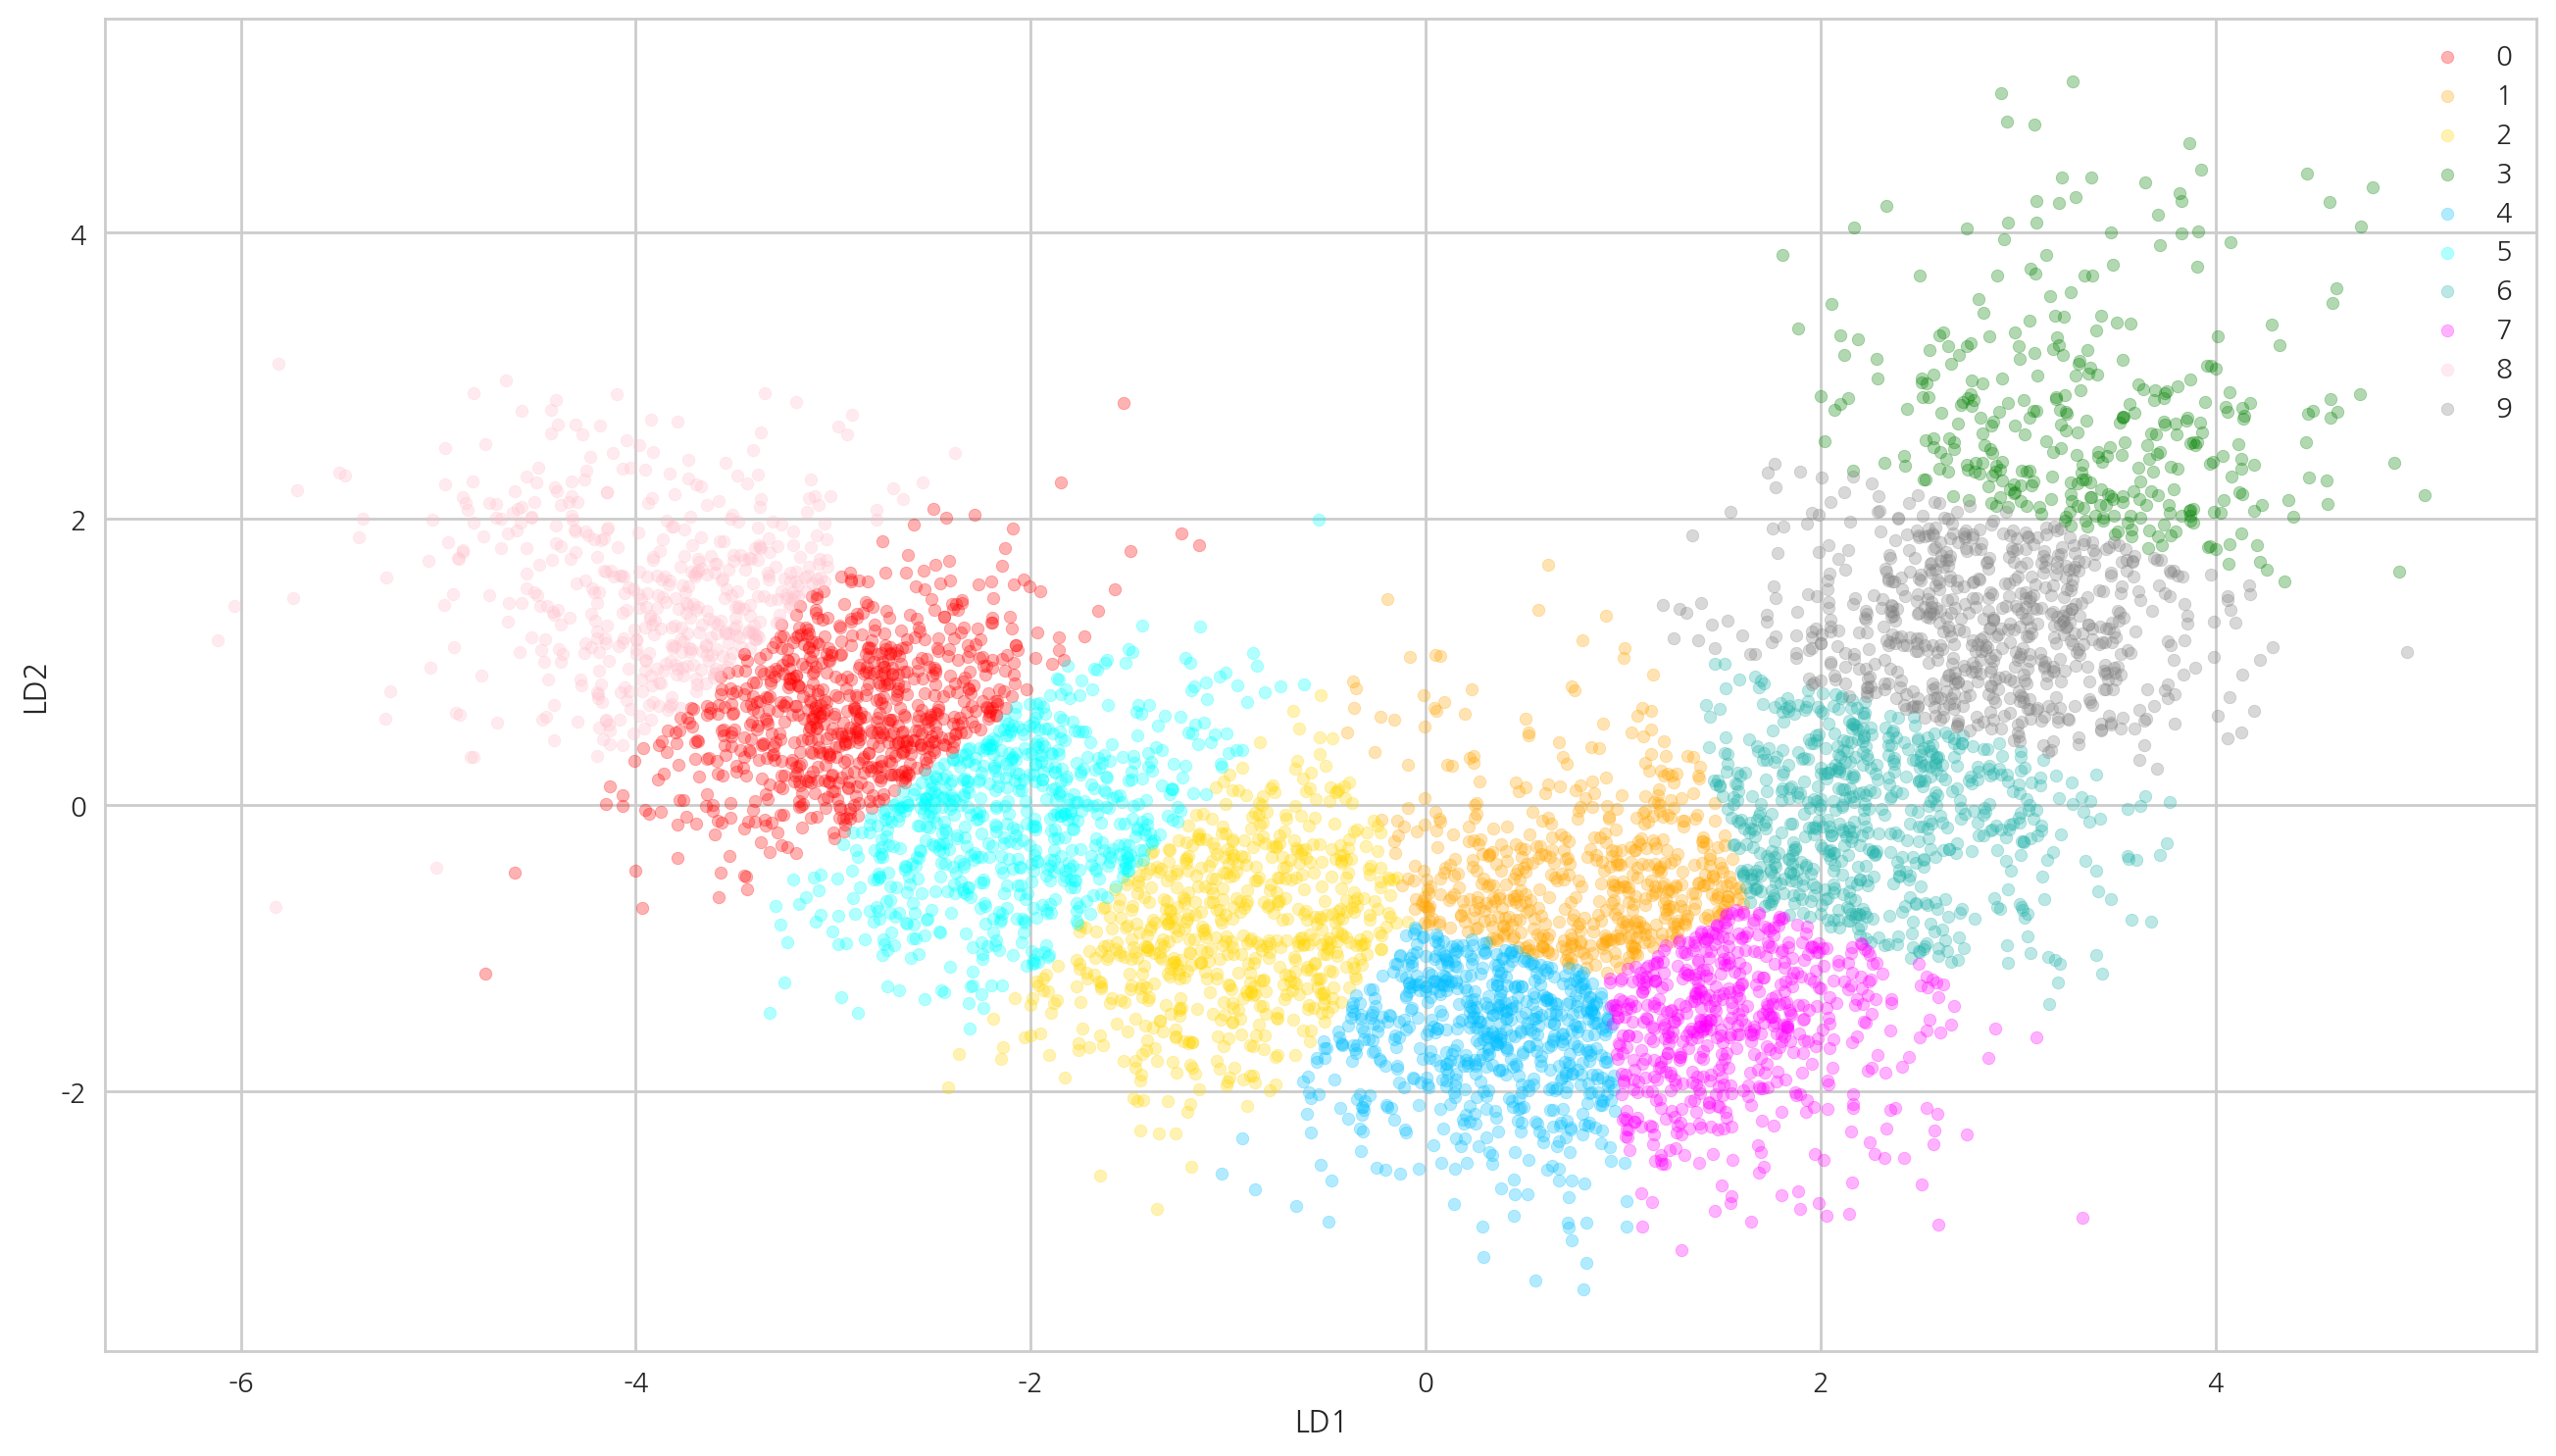

In [47]:
position_plot(ldaDf, 10)

### (2) hierarchical clustering

In [20]:
clusDf = ldaDf.iloc[:,:2]

In [21]:
# 계층 클러스터링을 수행하고 군집의 개수를 선택할 수 있게 해준다. 
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="ward")
labels = ac.fit_predict(clusDf)
print("Cluster labels : %s" %labels)

Cluster labels : [2 7 0 ..., 6 5 1]


In [22]:
ldaDf["cluster"] = labels

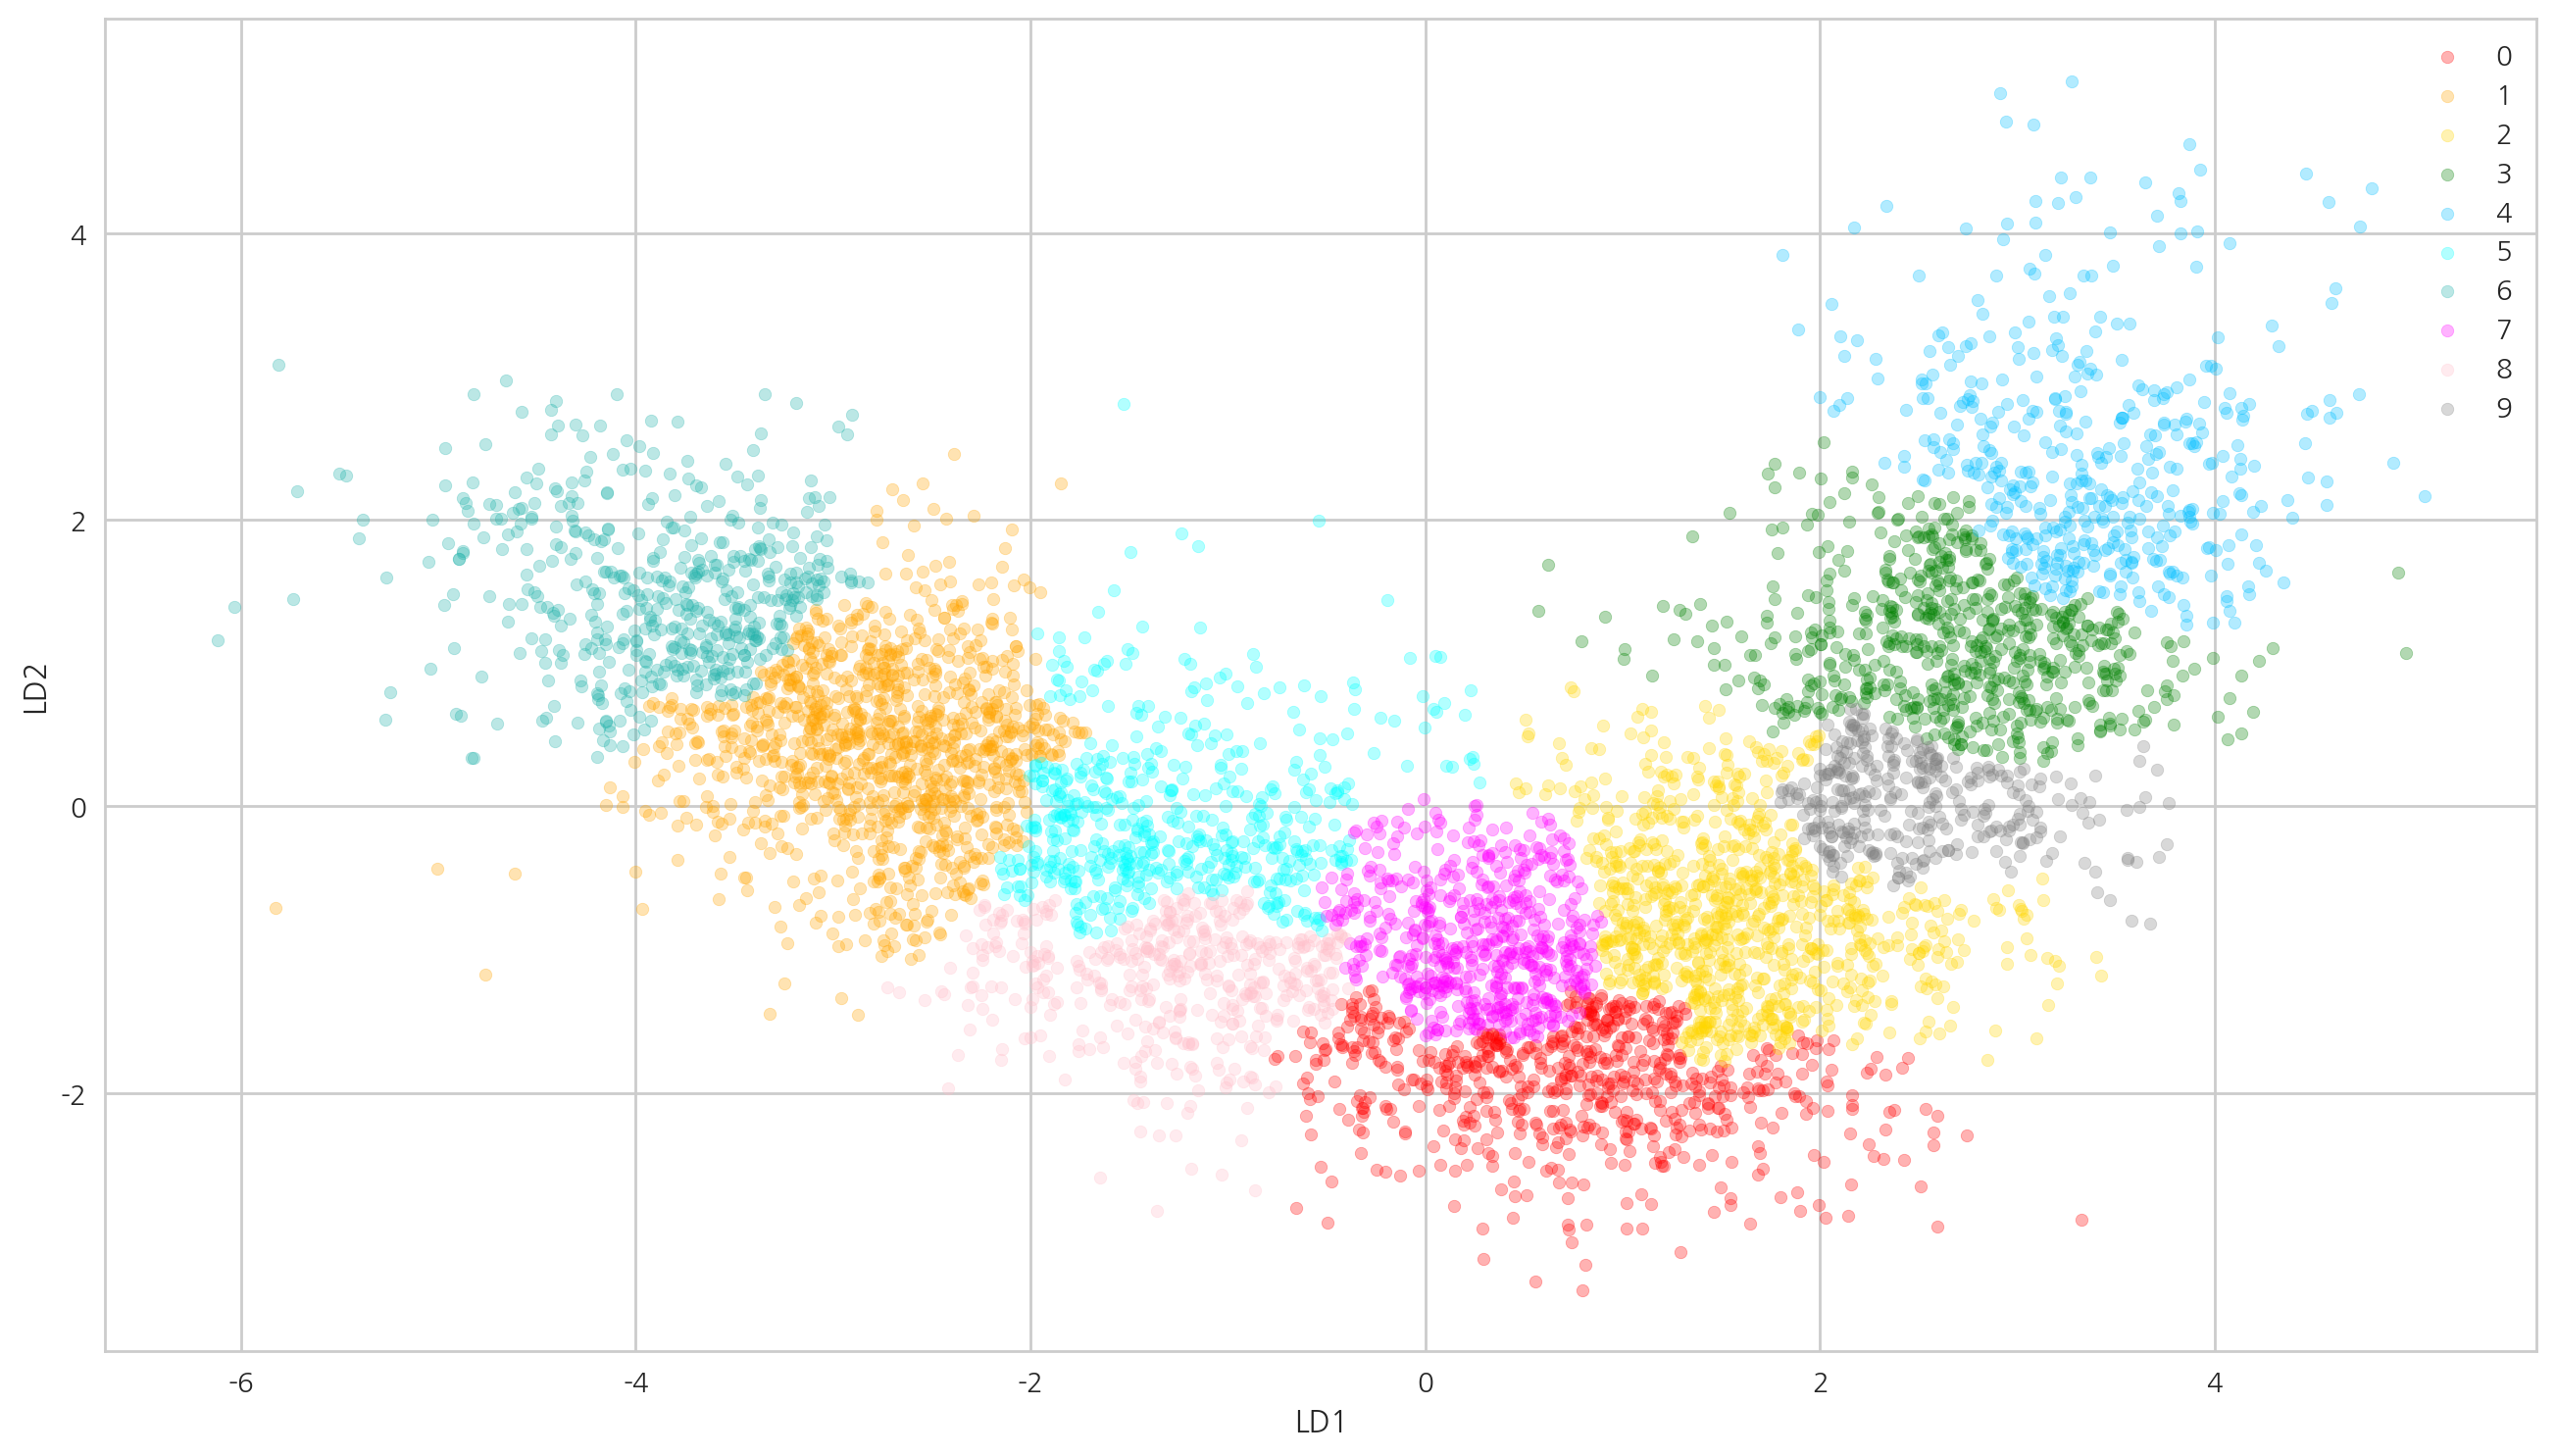

In [23]:
position_plot(ldaDf, 10)

### (3) EM clustering

In [24]:
from sklearn import mixture
from sklearn import metrics
from sklearn.metrics import silhouette_samples
import pandas as pd

em = mixture.GMM(n_components=10)
y = em.fit_predict(clusDf) 

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(clusDf, y, metric='euclidean'))
silhouette_vals = silhouette_samples(clusDf, y, metric="euclidean")
silhouette_vals

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/u

Silhouette Coefficient: 0.273


array([ 0.26913512,  0.44268377,  0.11145867, ...,  0.48432376,
        0.10030709,  0.36492448])

In [25]:
ldaDf["cluster"] = y

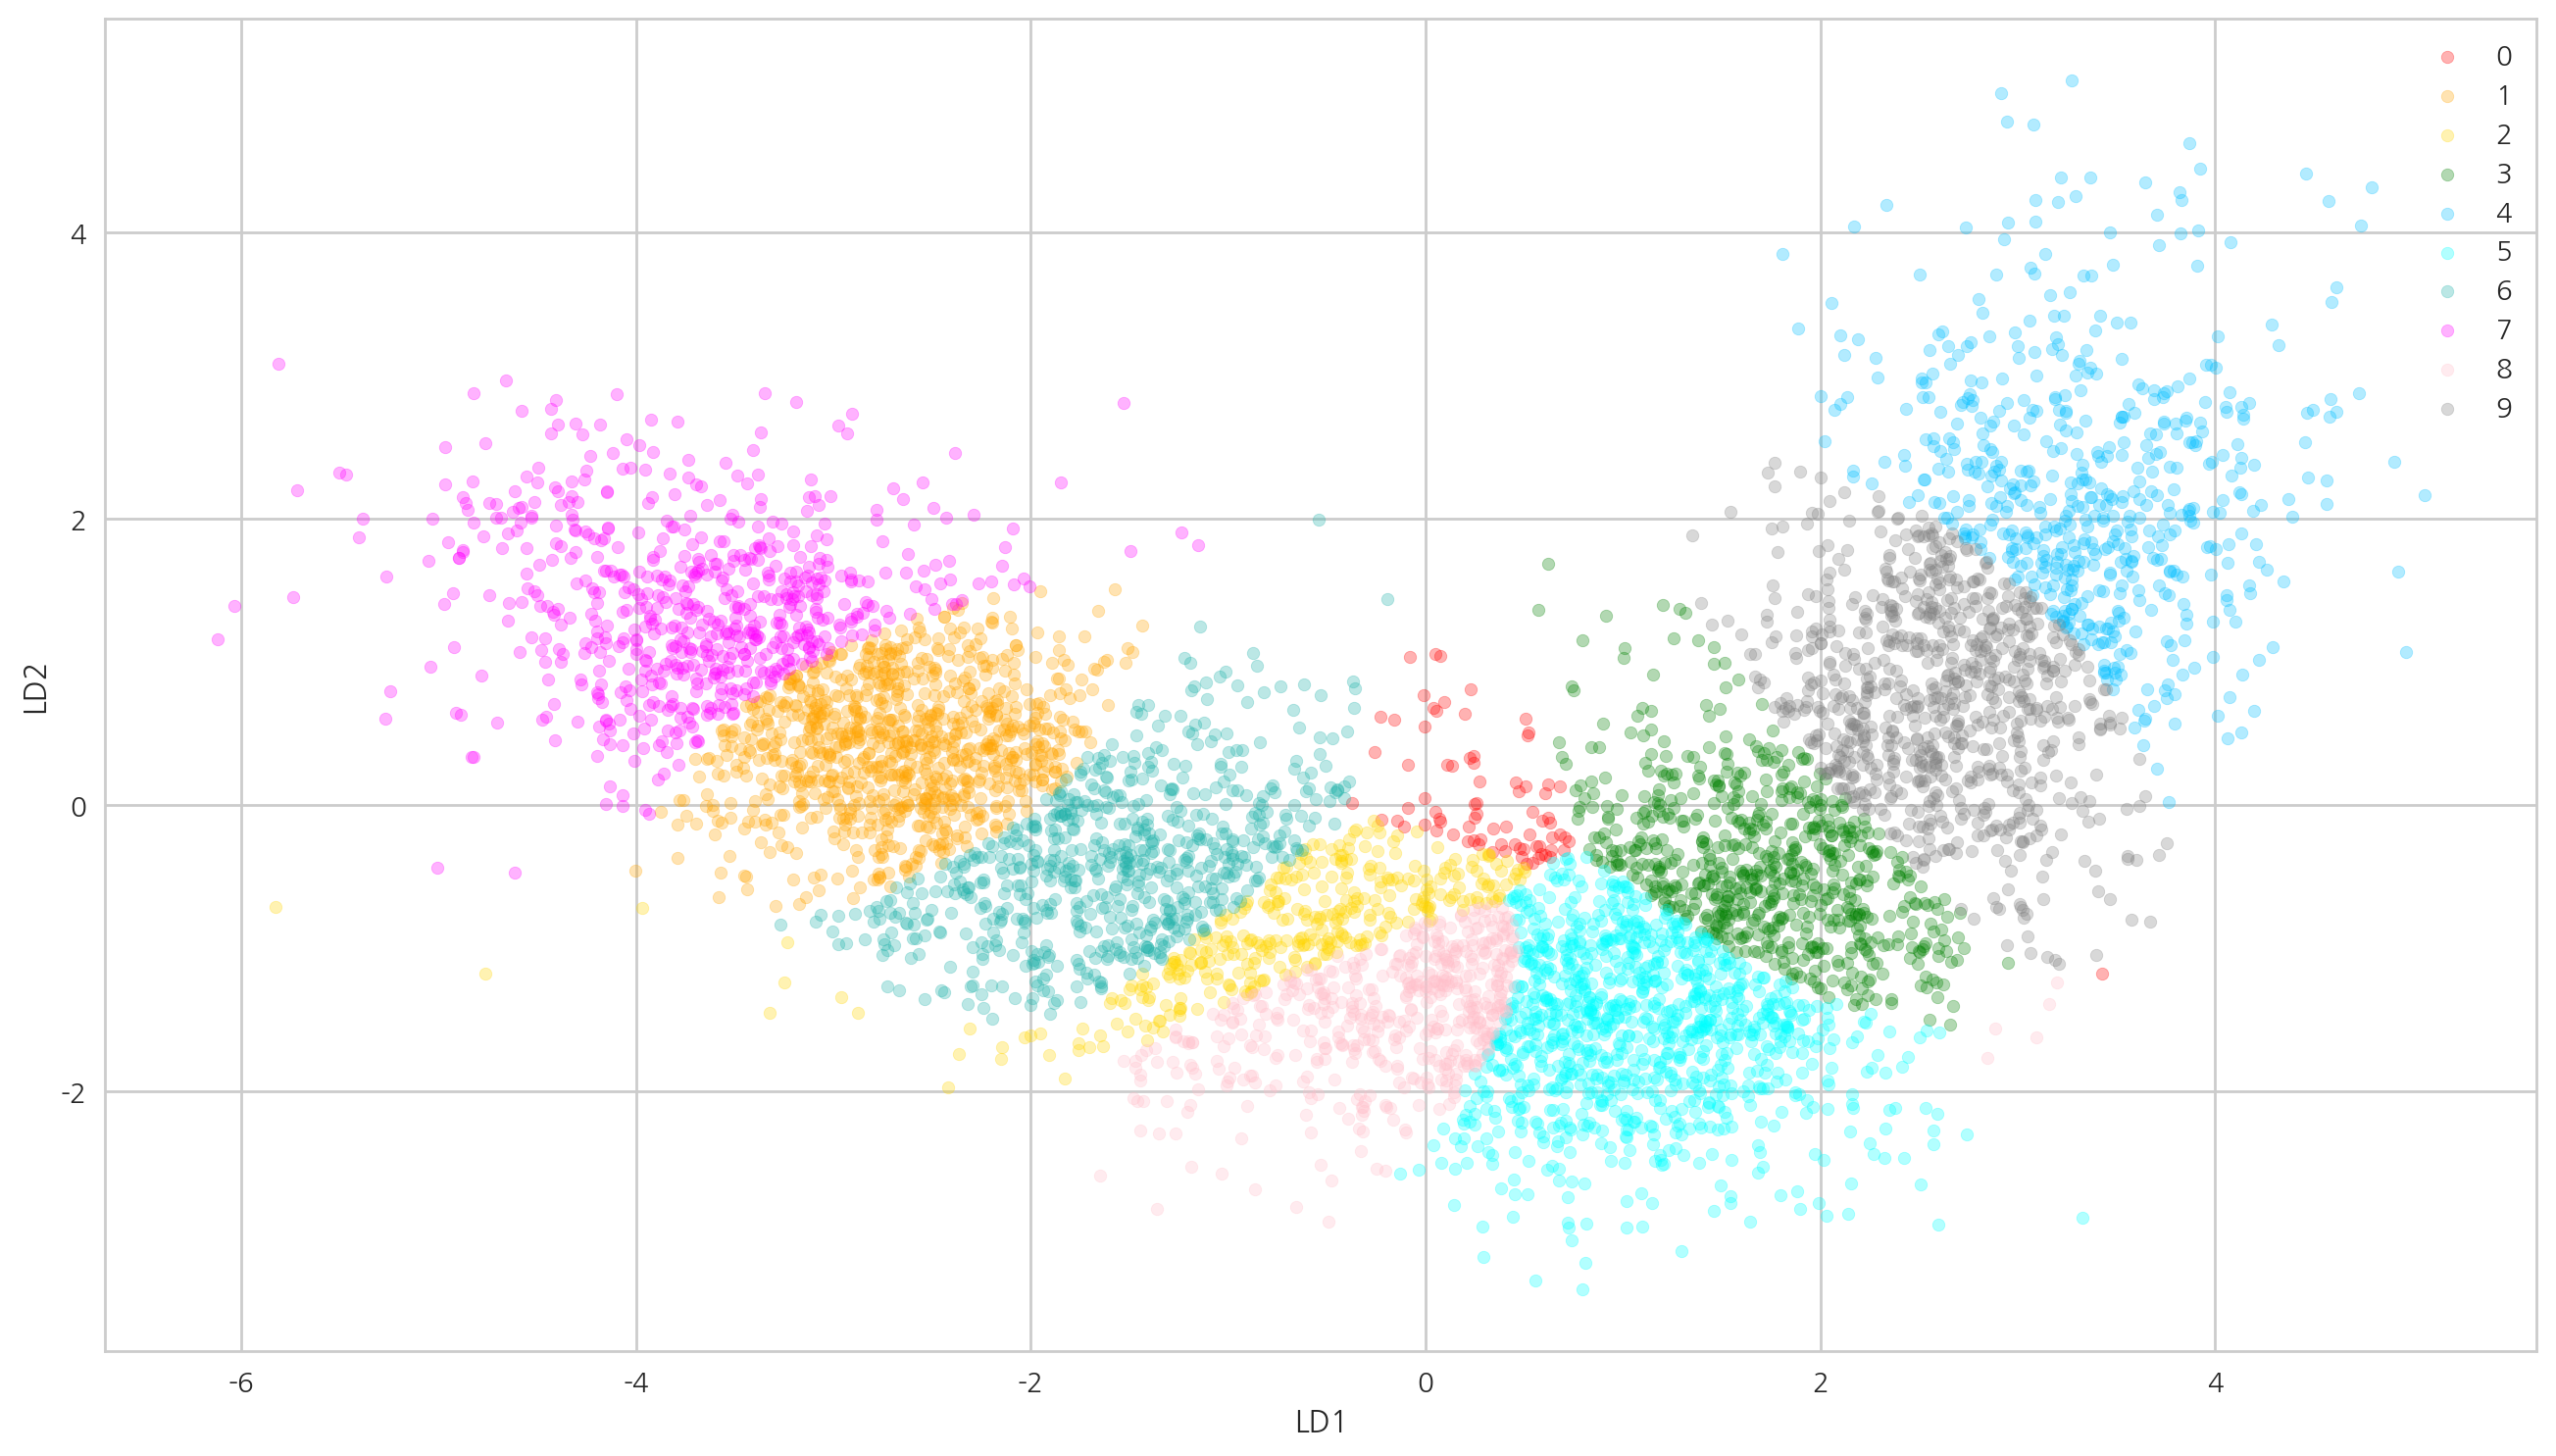

In [26]:
position_plot(ldaDf, 10)

### (4) 가장 결과가 좋은 것? kmeans++

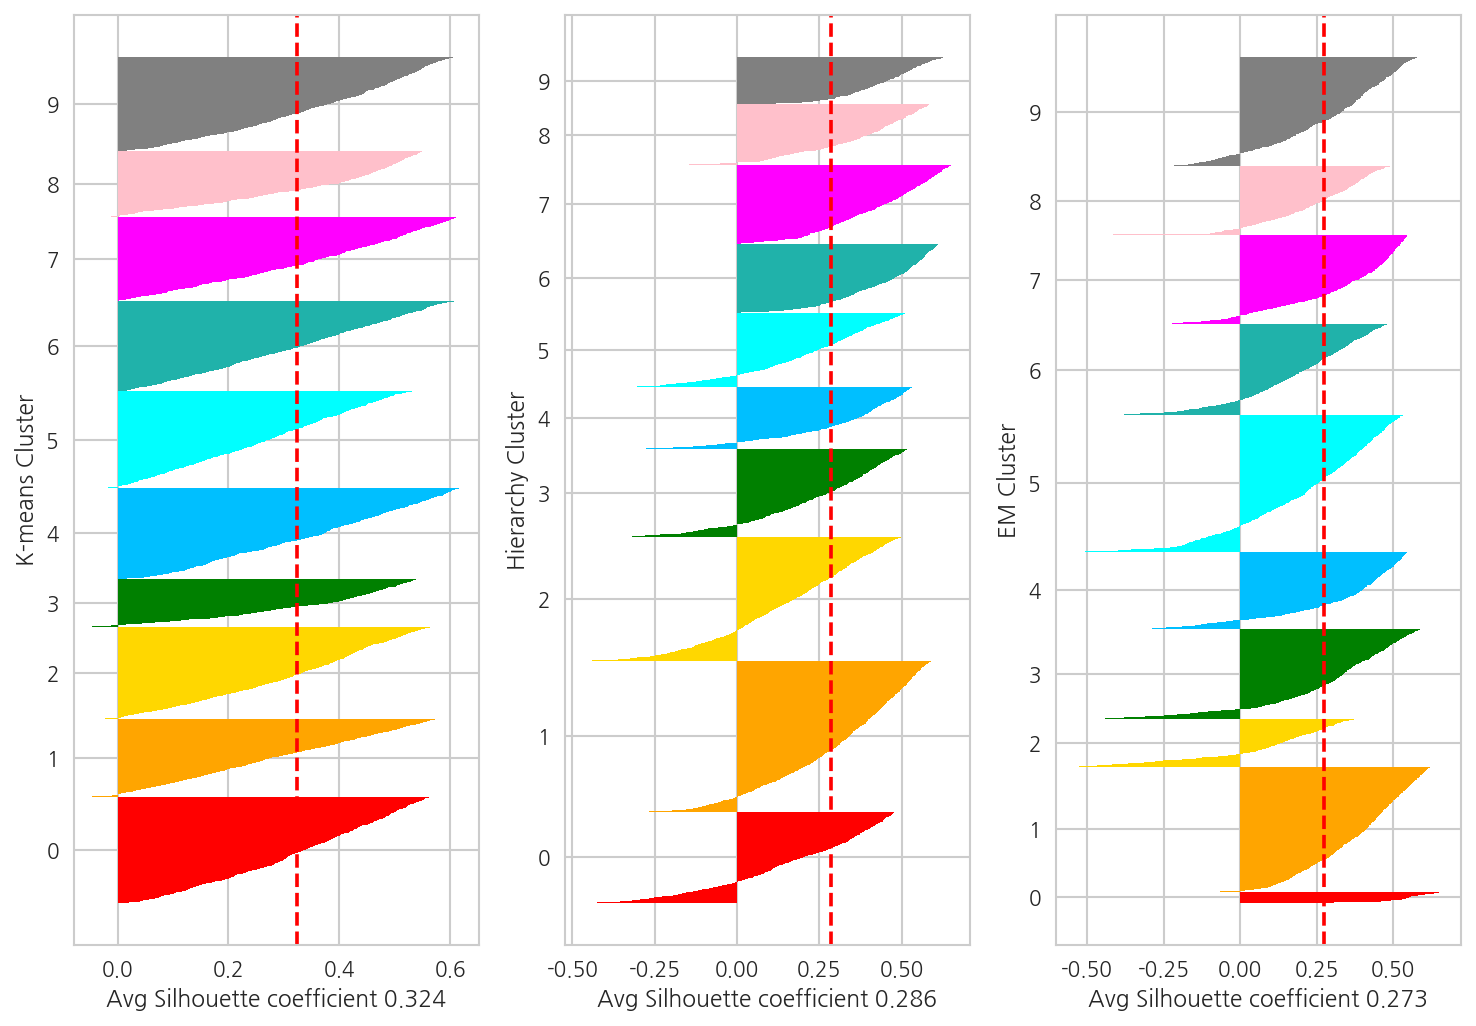

In [27]:
silhouette_plot2(ldaDf.iloc[:,:2], model, labels, y)

**Silhouette coefficient 값이 모든 클러스터에 대해 고르게 분포하며 -값이 거의 존재하지 않는 K-means Clustering을 최선의 클러스터링 방법으로 선택하였다.**

## 3)  클러스터 분석

In [48]:
dfX["cluster"] = ldaDf["cluster"]

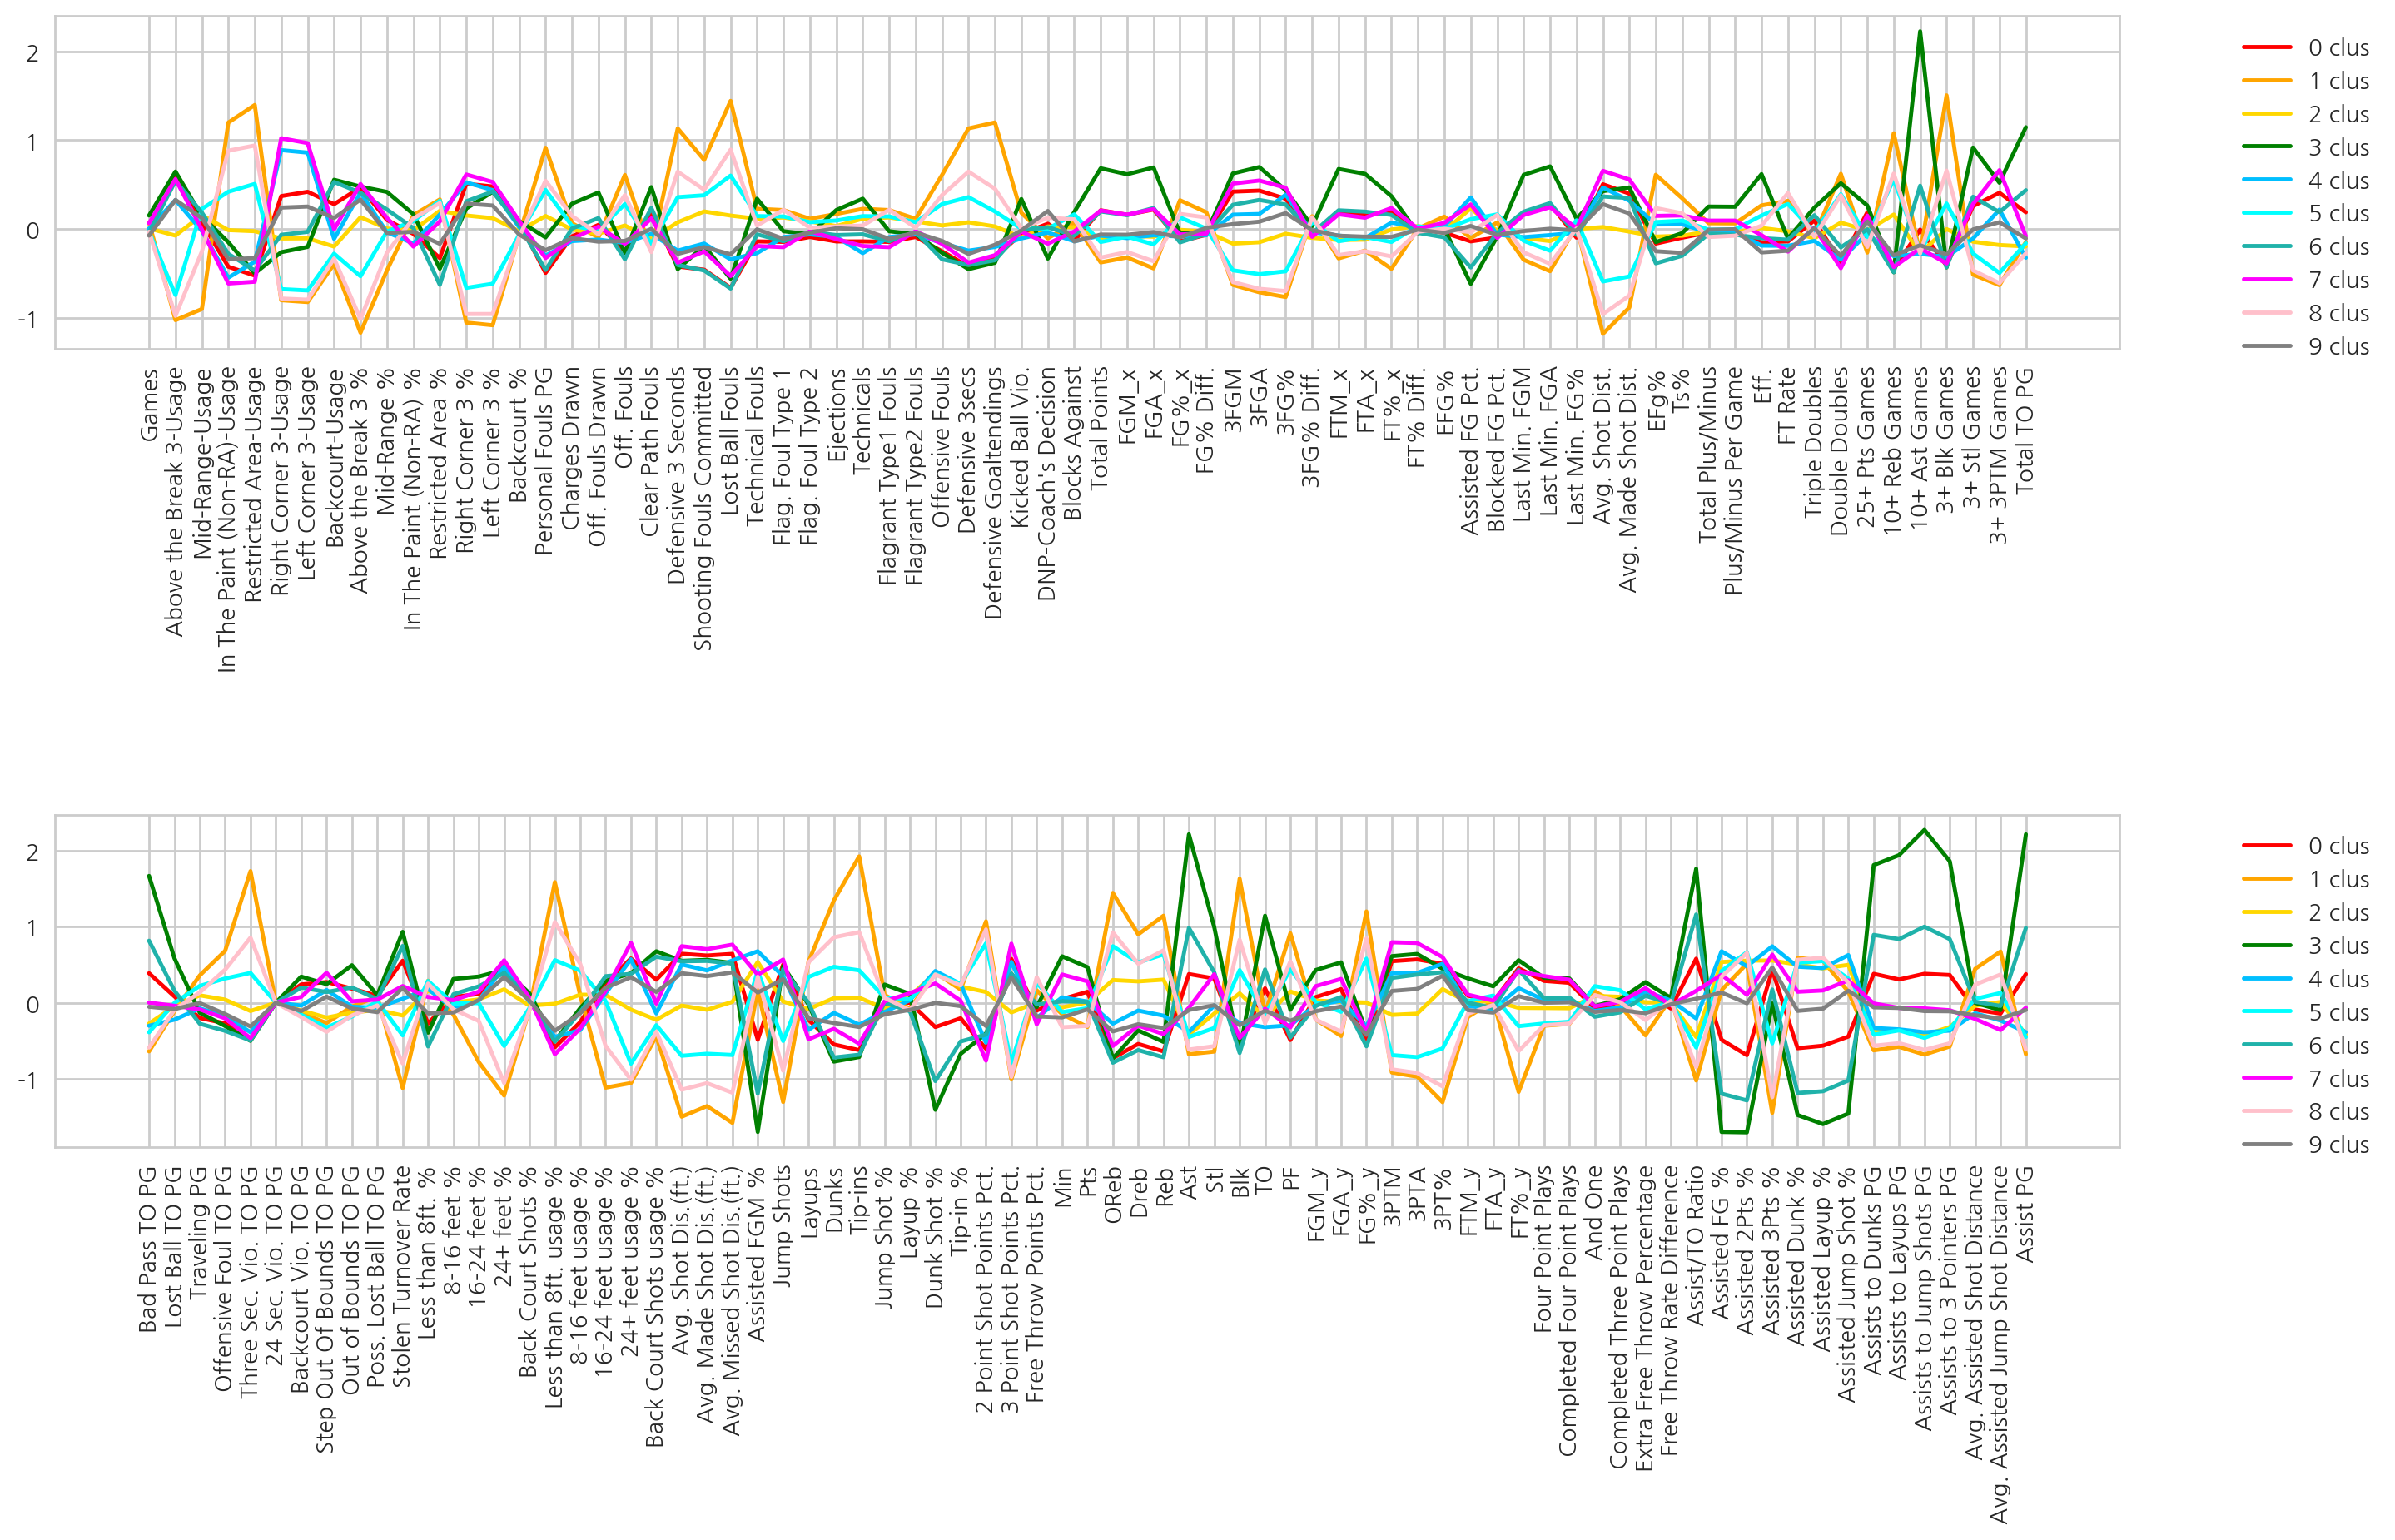

In [22]:
cluster_plot(dfX, 10)

### - 클러스터 속성 분석

10개의 클러스터를 인덱스로 feature 평균을 데이터프레임으로 작성, 클러스터별 속성을 분석하였다

In [59]:
dfX_cluster

cluster     Games  Above the Break 3-Usage  Mid-Range-Usage  \
0      All round player -0.099206                 0.207383         0.138483   
1        Aggressive Big -0.035204                -0.930053        -0.045020   
2      Midrange stopper -0.069967                 0.077748         0.095180   
3      Defensive passer -0.043642                 0.594326         0.029608   
4             Commander  0.106199                 0.605699         0.177889   
5          Long shooter  0.044653                 0.453354         0.032136   
6       Non scoring big -0.034851                -0.408961         0.325793   
7        Classic Bigmen  0.040362                -1.014190        -0.751288   
8  Balanced wing scorer  0.045129                 0.213675        -0.003215   
9          Ball Handler -0.046622                 0.556074         0.147739   

   In The Paint (Non-RA)-Usage  Restricted Area-Usage  Right Corner 3-Usage  \
0                    -0.293888              -0.168240              0.042264   
1                     0.729046               0.790676             -0.759755   
2                    -0.144010              -0.065352             -0.042538   
3                    -0.398977              -0.522075              0.434702   
4                    -0.218406              -0.486732             -0.187711   
5                    -0.620892              -0.532017              1.026080   
6                     0.161212               0.185998             -0.467148   
7                     1.144336               1.287180             -0.796932   
8                    -0.338197              -0.223599              0.507855   
9                    -0.335244              -0.481644              0.094093   

   Left Corner 3-Usage  Backcourt-Usage  Above the Break 3 %  Mid-Range %  \
0             0.017478         0.099737             0.113893     0.010053   
1            -0.774143        -0.316755            -0.869516    -0.147926   
2            -0.013335        -0.123218             0.186449    -0.074287   
3             0.477629         0.215247             0.491602     0.084122   
4            -0.140262         0.548827             0.479253     0.379300   
5             0.979438        -0.043829             0.475998     0.048635   
6            -0.484547        -0.224726            -0.157997     0.057907   
7            -0.814699        -0.367330            -1.151716    -0.447857   
8             0.487501        -0.110450             0.341613    -0.050673   
9             0.131394         0.451263             0.416580     0.150306   

   In The Paint (Non-RA) %  Restricted Area %  Right Corner 3 %  \
0                 0.065973          -0.236108          0.147163   
1                 0.130705           0.309138         -0.883391   
2                -0.093056           0.067313          0.253192   
3                -0.028220          -0.150151          0.506274   
4                 0.125437          -0.489522          0.281613   
5                -0.191908           0.084076          0.573600   
6                 0.034177           0.211011         -0.278929   
7                 0.148590           0.336375         -1.036792   
8                -0.082380           0.186650          0.421421   
9                -0.038423          -0.561614          0.362710   

   Left Corner 3 %  Backcourt %  Personal Fouls PG  Charges Drawn  \
0         0.121174    -0.011075          -0.026361      -0.054675   
1        -0.868014    -0.083906           0.486156       0.061778   
2         0.179388    -0.058787           0.046625      -0.074363   
3         0.468077     0.030652          -0.385886      -0.080639   
4         0.478213     0.093130          -0.187546       0.160736   
5         0.478687     0.041353          -0.355407      -0.113808   
6        -0.251654    -0.051498           0.297020       0.109405   
7        -1.059024    -0.079120           0.800119       0.109211   
8         0.375676     0.034904          -0.099791      -0.174370   


클러스터에 높은 값을 가진 feature 순위를 매겨 중요속성을 골라내었고, 선수의 플레이스타일을 정의하여 클러스터에 새롭게 라벨링을 해주었다.

In [70]:
data2

name           diff1 diff2            diff3  \
0             Commander             Ast   Pts   Triple Doubles   
1          Ball Handler             Pts   Ast            3PT %   
2  Balanced wing scorer           3PT %   Pts   Assisted FGM %   
3      All round player  Triple Doubles   Pts              Ast   
4      Midrange Monster  Double Doubles   Reb              Pts   
5      Defensive passer      Jump Shots   Ast              Stl   
6        Classic Bigmen             Reb   Blk   Double Doubles   
7        Aggressive Big            Oreb   Pts              Blk   
8       Non-scoring big            Oreb   Blk           FG %_y   
9        3point shooter           3PT %   Pts              Stl   

              diff4             diff5  
0    Double Doubles             3FG %  
1               Stl               Min  
2     3+ 3PTM Games       Dunk Shot %  
3               Stl             3PT %  
4               Blk             Dunks  
5    Double Doubles             3FG %  
6         FG % diff             Dunks  
7            FG %_y    Double Doubles  
8    Double Doubles               Pts  
9   Four Point Play     3+ 3PTM Games

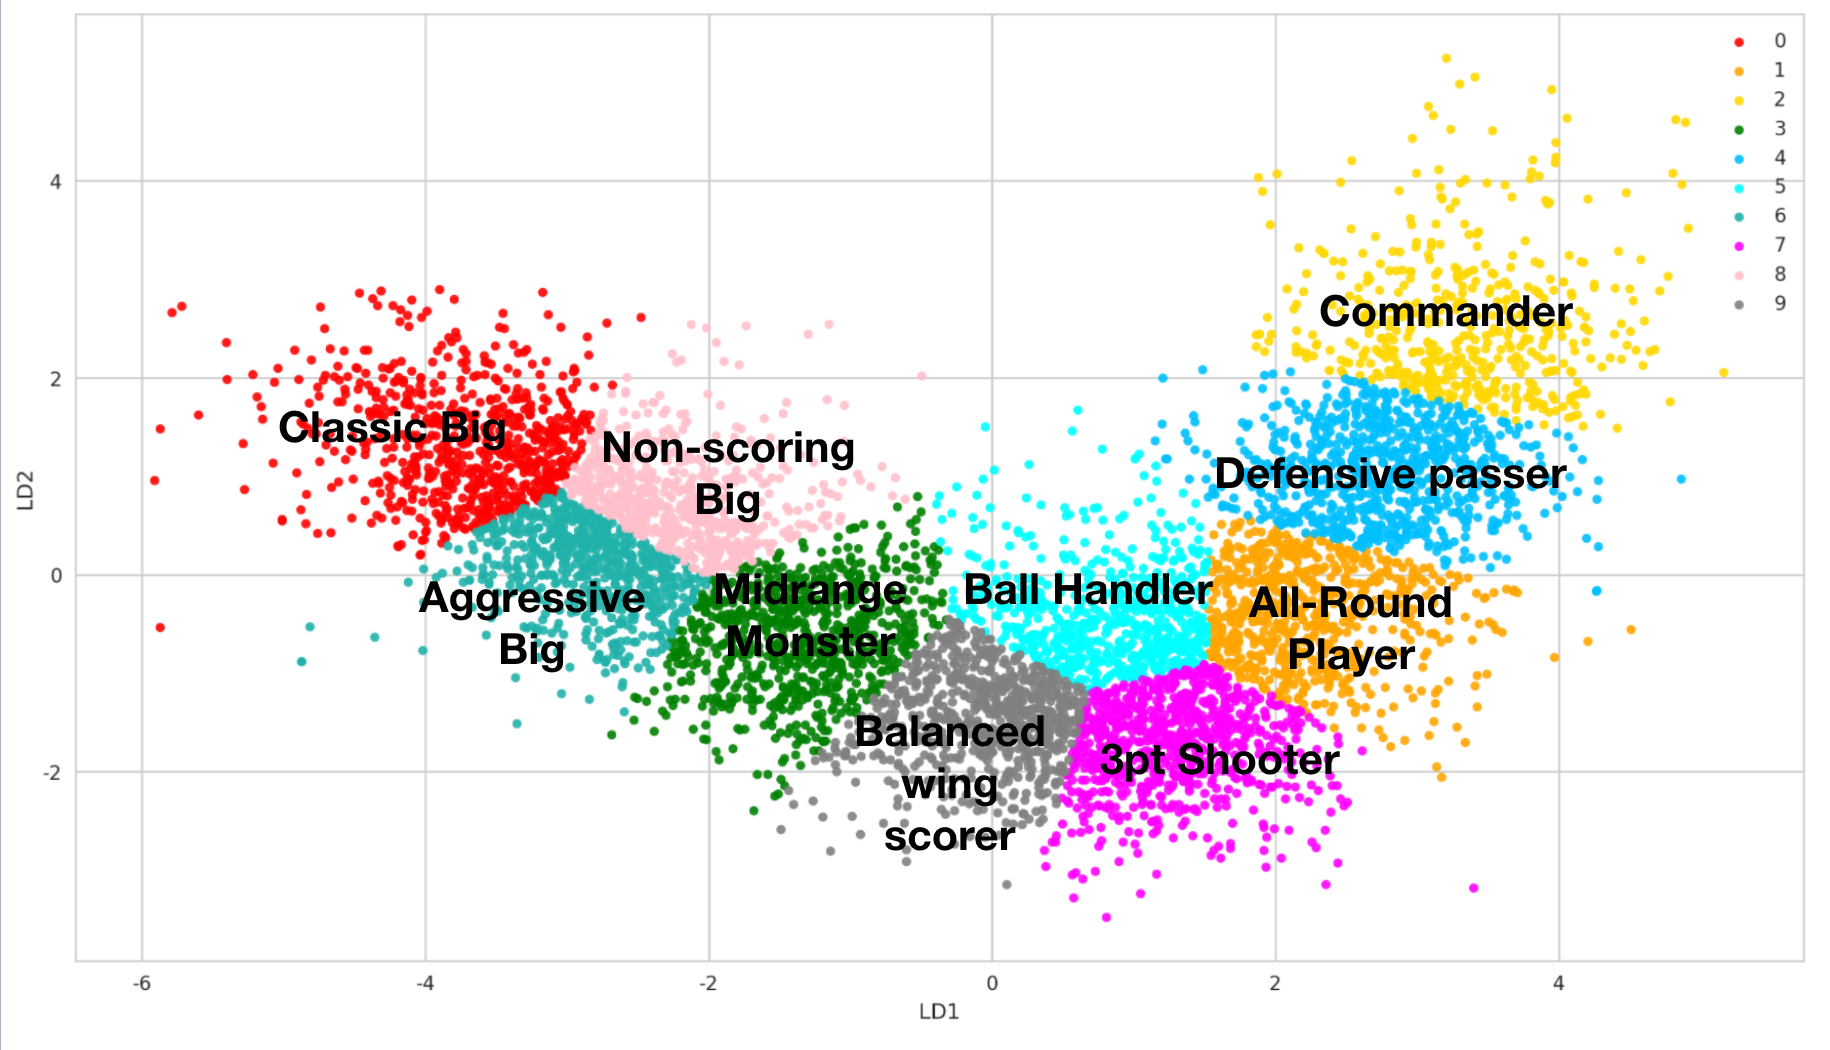

* Classic big : 골밑에서의 **득점, 공격 및 수비 리바운드**와 **블록**에 능한 선수 (디안드레 조던)
* Aggressive big : **공격 리바운드와 블록, 득점력**이 강한 선수 (앤쏘니 데이비스)
* Non-scoring Big : **리바운드와 블록에 강점**이 있지만 득점력이 약한 선수 (드레이먼드 그린)
* Midrange Stopper : **필드골 득점력과 리바운드** 및 **블록샷 등 수비**에 강점이 있는 선수 (케빈 듀란트)
* Balanced wing scorer : **측면 공격, 3점슛, 패스를 받아 넣는 필드골**에 강점이 있는 선수 (제이 크라우더)
* Ball Handler : 돌파 등을 통해서 **본인이 만들어서 득점을 하며 2차 어시스트**에 강점이 있는 선수 (카와이 레너드)
* Long shooter : **3점 슛 득점력이 가장 뛰어난** 선수 (크레이 탐슨)
* All-Round Player : **득점, 어시스트, 리바운드, 3점 슛 성공률**등 여러 스탯에 강점이 있는 선수 (르브론 제임스)
* Defensive passer : **어시스트와 스틸에 강점**이 있고 **수비적**인 성향이 강한 선수(마이크 콘리)
* Commander : **어시스트를 주력**으로 하는 **득점력**을 겸비한 **플레이메이커** (크리스 폴)

### - 기존 5개 포지션의 10개로의 분류
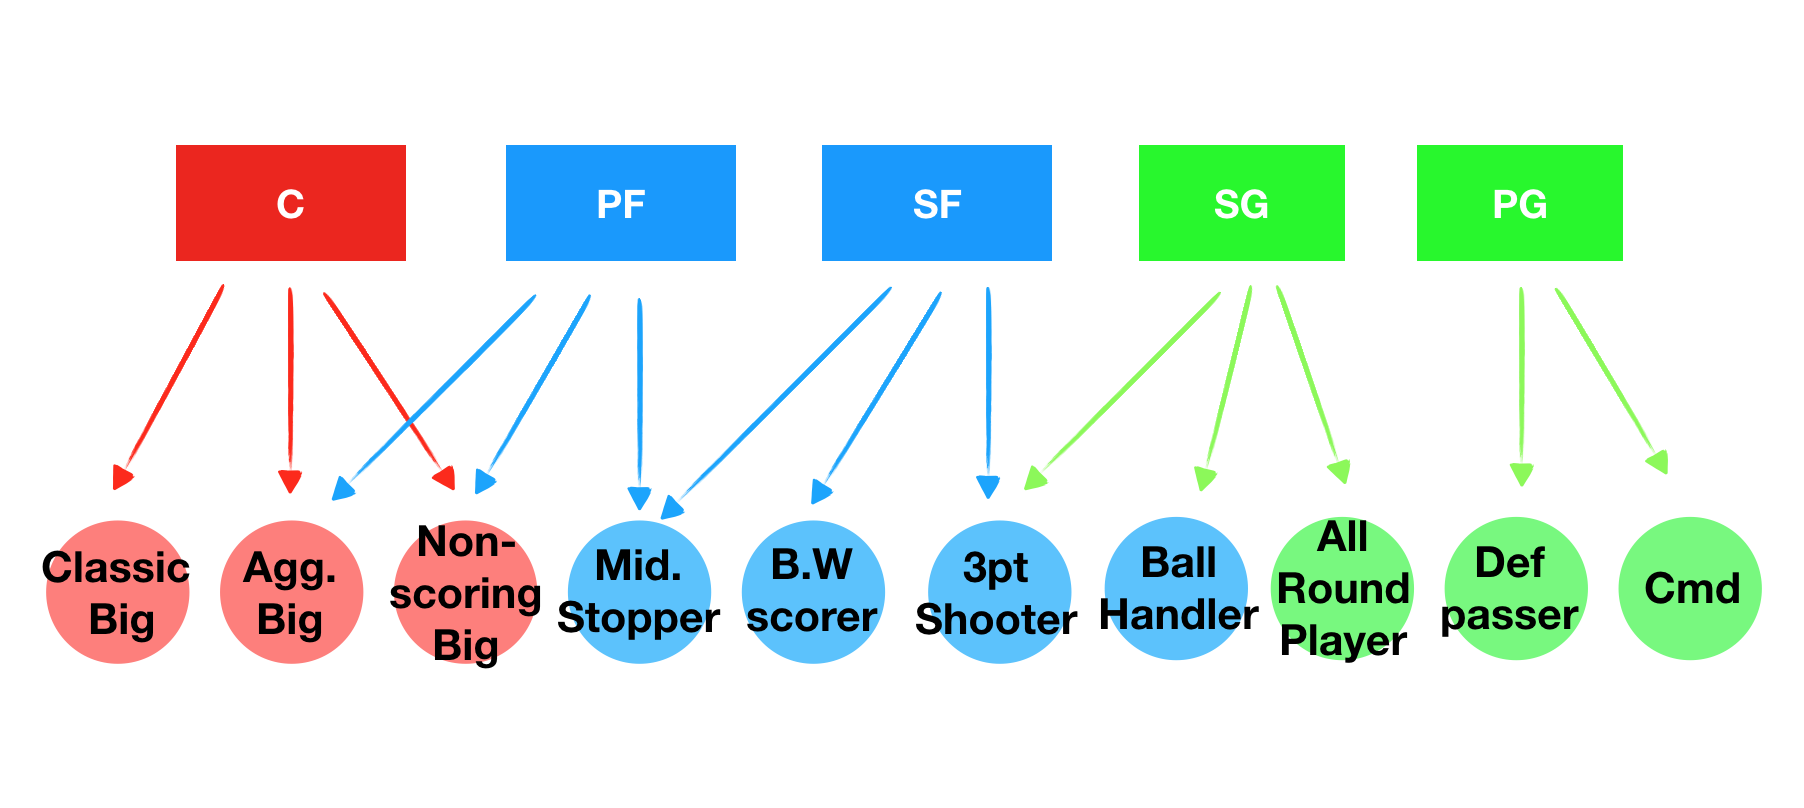

# 3. Apply basketball analysis by clustering data

## 1) case 1 : kevin durant의 role 변화(Ball handler ->Midrange Stopper)

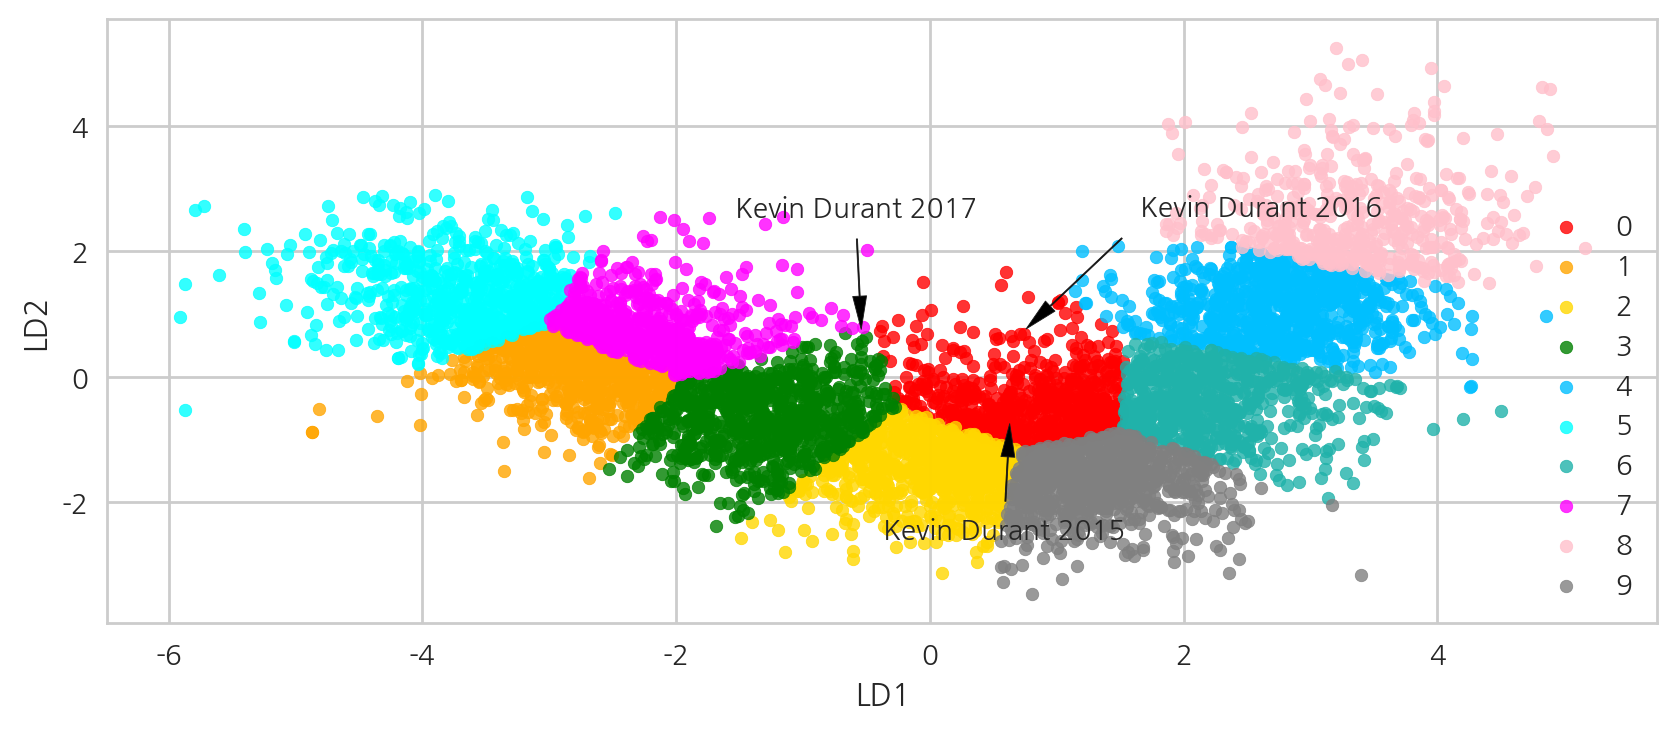

### 듀란트 관련 기사 <케빈 듀란트, 리그 정상급 골밑 수비수로 거듭나다>

이번 시즌 팀을 옮긴 듀란트에게 **두 가지 변화**가 있었다. 바로 **'효율성'**과 **'골밑 수비'**다. 이번 시즌 듀란트는 커리어 가장 적은 야투만 시도하고 있다. 경기당 17.0개를 시도 중인데, 평균 득점은 25.8점으로 준수한 편이다. 이는 야투 성공률 증대와 연관된다.예전만큼 많은 슛을 던지지 않아도 위력적인 모습을 보여주고 있다는 의미. 

이와 함께 듀란트는 **골밑 수비**에 전념하고 있다. 평균 1.7블록은 커리어-하이에 해당한다. 

듀란트는 이번 시즌 **5피트(1.5m) 이내에서 허용한 야투 성공률 47.5%**를 기록 중이다. 상대 공격수가 골밑 안쪽까지 깊숙이 침투해도 야투 성공률을 50% 미만으로 틀어막았다는 의미. 이는 리그 정상급 수치다. 이번 시즌 해당 구역에서 4.5개 이상 야투를 수비한 선수는 60명이다. 그중 듀란트의 야투 허용률은 19위다. 19위 안에 든 선수 중 **듀란트를 제외한 모든 선수가 파워포워드 혹은 센터**다. 듀란트는 스몰포워드임에도 엄청난 골밑 수비 능력을 뽐내고 있다. 지난 시즌 해당 구역에서 50.7%의 야투 허용률을 기록한 것보다 더욱 성장한 수치다.

(출처 : http://www.rookie.co.kr/news/articleView.html?idxno=7441)

**Kevin Durant**의 경우 **이적 전과 후**과  5개 포지션 중 하나인  **SF**로 동일하지만,  **10개의 포지션**으로 볼 경우 팀에서 **주어진 role**을 알 수 있게 된다. 기존의 Kevin Durants는 **Ball Handler**(돌파 등을 통해서 본인이 만들어서 득점)의 역할을 했으나, 이번 시즌 골든스테이트에서 **Midrange Stopper**(필드골 **득점**과 **수비**에 강점이 있는 선수)의 역할을 하고 있다.

## 2) case 2 : 농구 흐름에 따른  최근 포지션 수요의 변화

- 1990 ~ 1999 : 센터의 시대(4대 센터)
- 2000 ~ 2009 : 슈팅가드의 전성시대
- 2010 ~ 2017 : 스몰볼 시대

(출처 : http://www.rookie.co.kr/news/articleView.html?idxno=6126)

## small ball이란?

**야구**에서 말하는 **스몰볼(small ball)**은 기존에 각광받던 홈런과 장타보다는 **출루와 도루, 진루타** 등으로 점수를 만드는 조직적인 야구를 뜻한다. 

이와 비슷하게 최근 농구의 흐름은 높이 중심에서 **속도와 공간 중심**으로 이동했다. 다수의 NBA 팀은 신장이 낮은 선수들을 활용하는 "스몰라인업"을 통해 스피드를 높이며 공간을 창출한다. 농구 전문가들은 이러한 전략을 두고 "스몰볼"(small ball)이라고 부른다.


 **"스몰볼"(small ball)**의 주 특징은 **빠른 공격 전개**로 많은 야투와 속공을 통해 **많은 공격 기회**를 만들어낸다.

## small ball의 도입에 따른 전체팀 시즌별 평균 득점

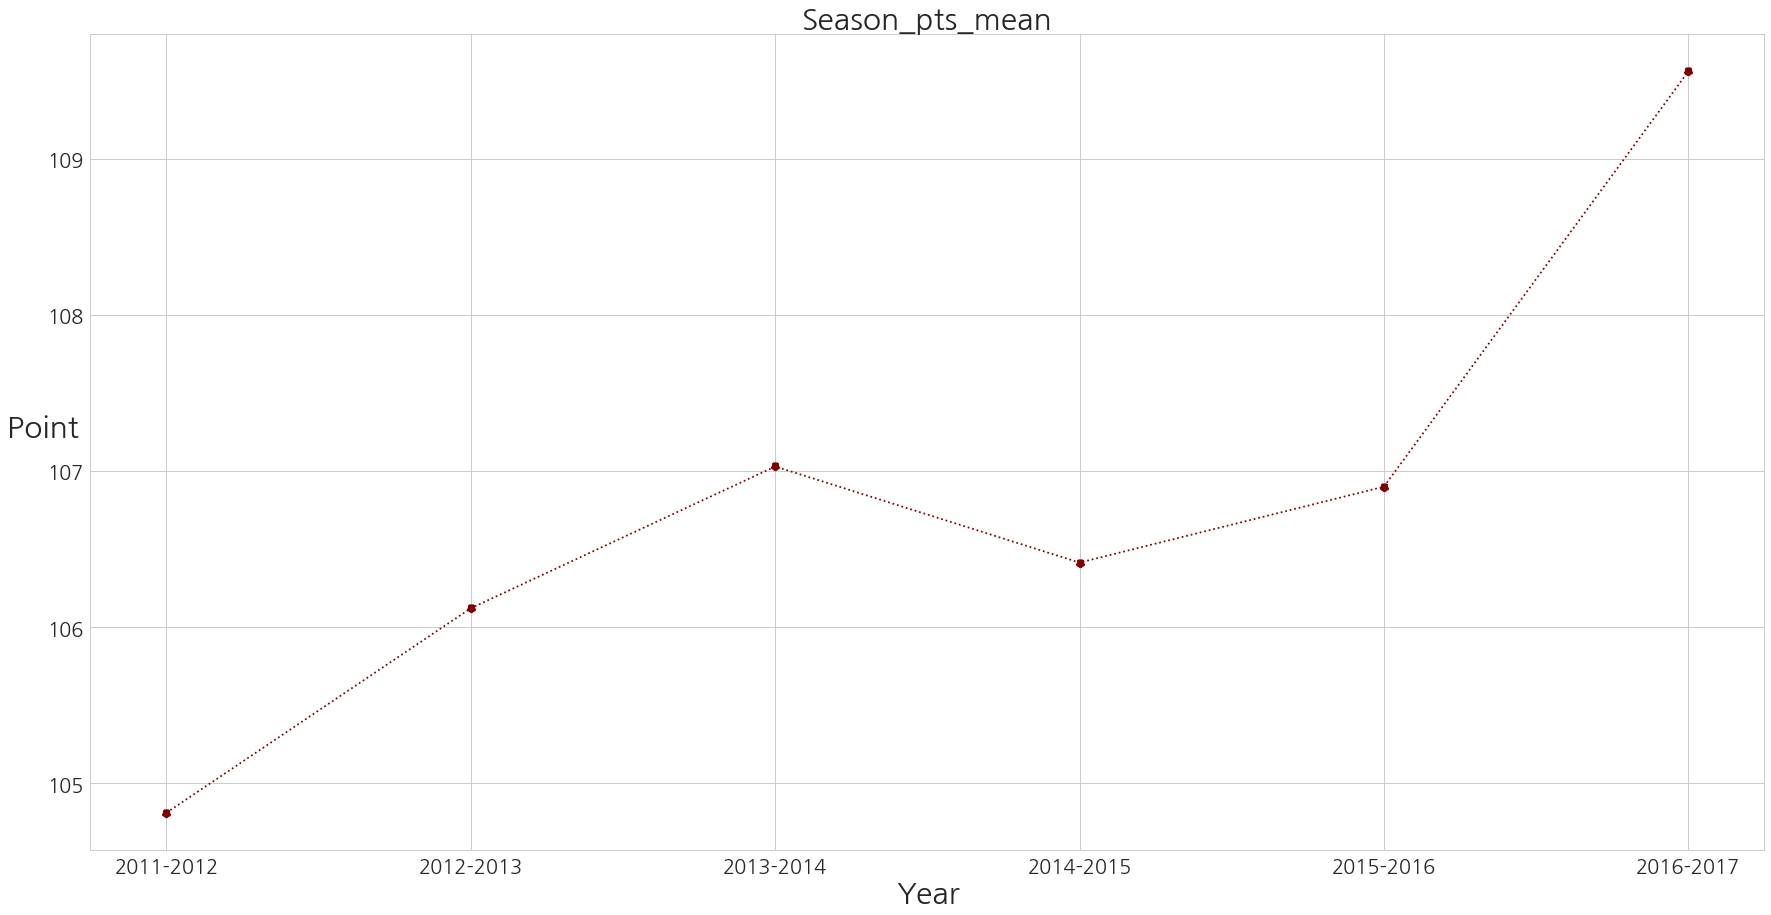

기존에 **스몰볼(Small ball)**을 구현하는 팀도 있었으나. 2010년도 부터는 팀 전략의 트렌드로 자리잡기 시작하여 **공격 횟수가 증가 함**에 따라, **전체 팀 평균 득점**이 **증가**하는 것을 알 수가 있다.

 ## small ball의 도입에 따른 기존 포지션 인원 수 변화

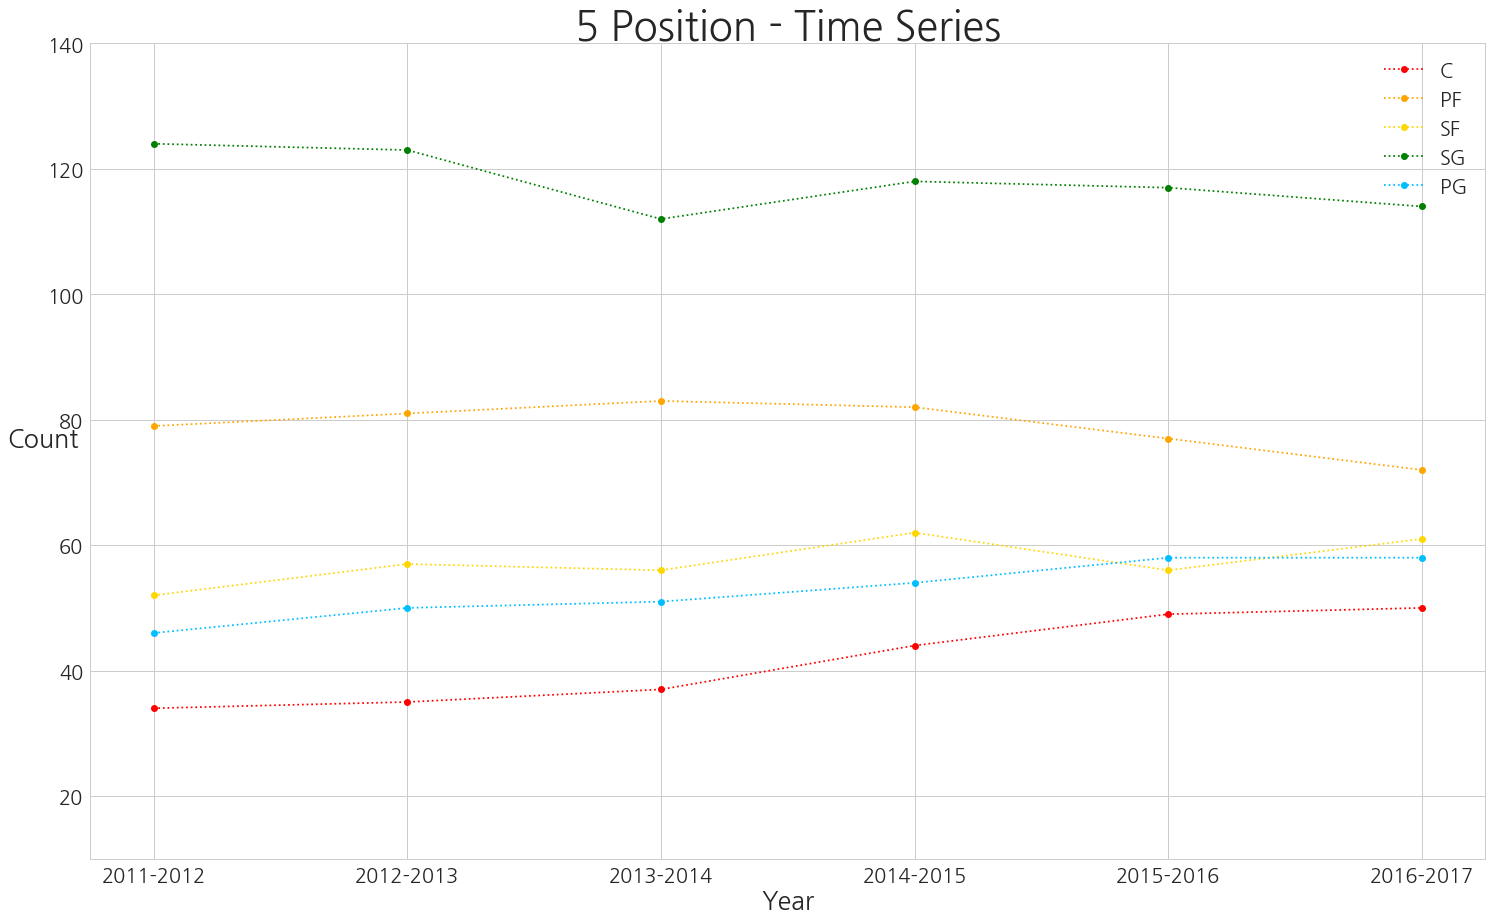

5개의 포지션으로 변화의 추이를 파악하면 C,SF,PG의 증가 및  SG,PF 포지션의 감소를 파악 할 수 있다.

이를 구체적으로 살펴보기 위해서 우리가 재정의한 **10개 포지션**으로 이하에서는 살펴보도록 하겠다.

## small ball의 도입에 따른 10 포지션 인원 수 변화

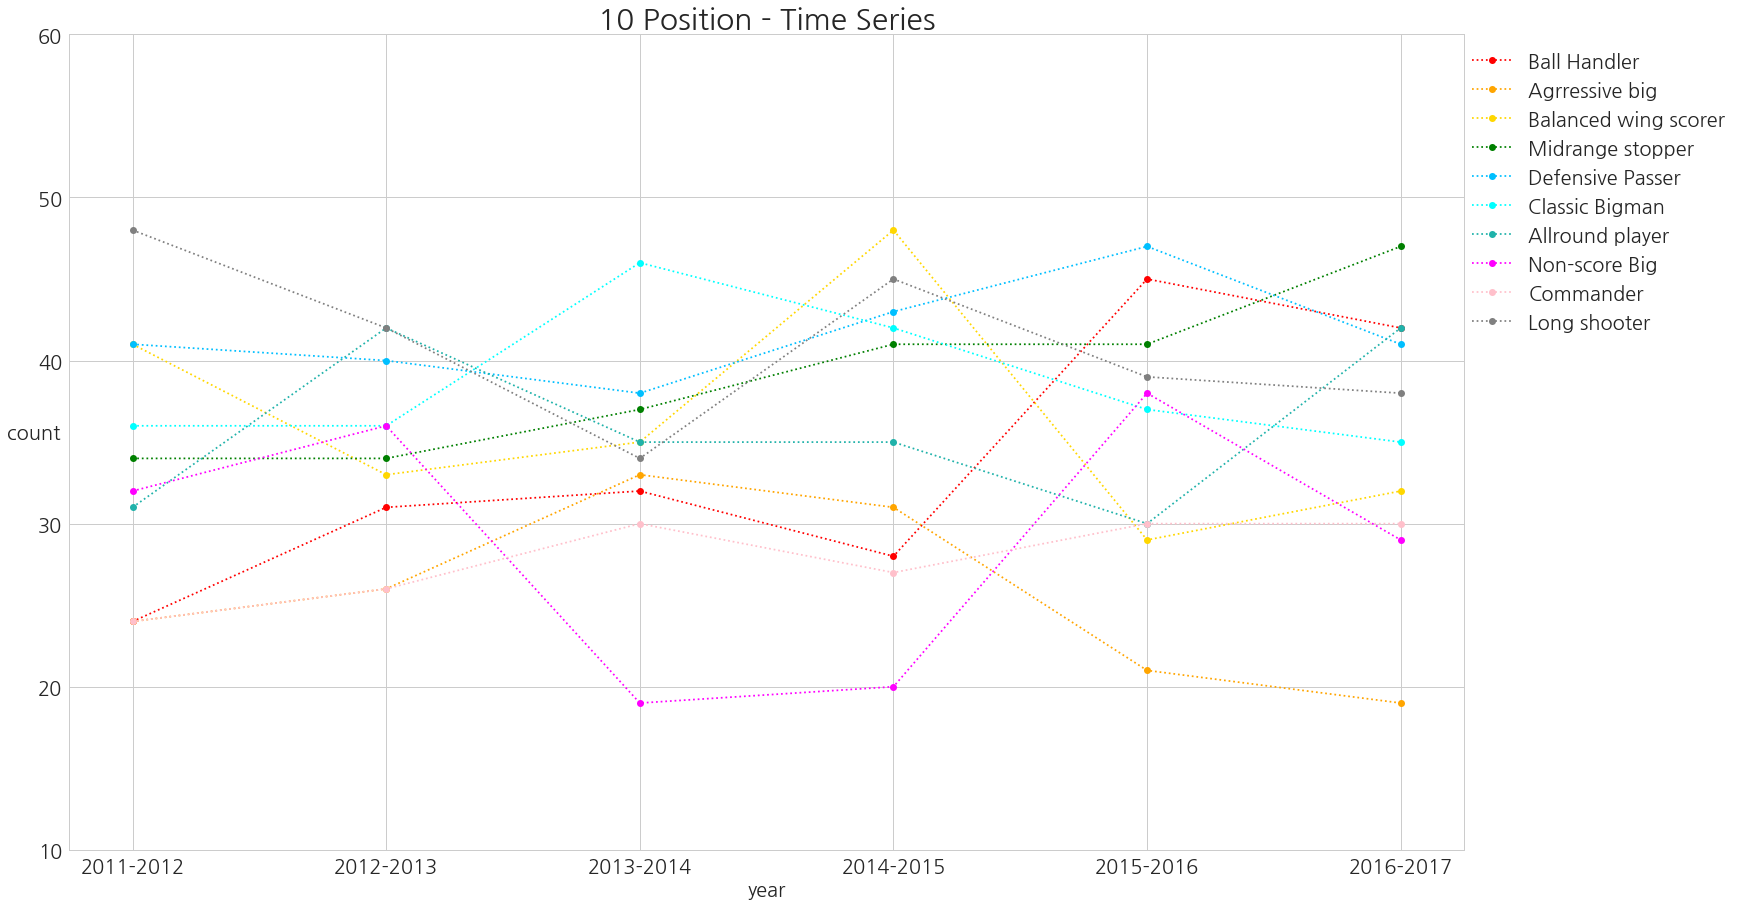

10개의 포지션을 변화의 추이는 위와 같다. 

Small ball의 흐름이 잘 드러나는 **4개의 포지션**을 이하에서 그려보도록 하겠다.

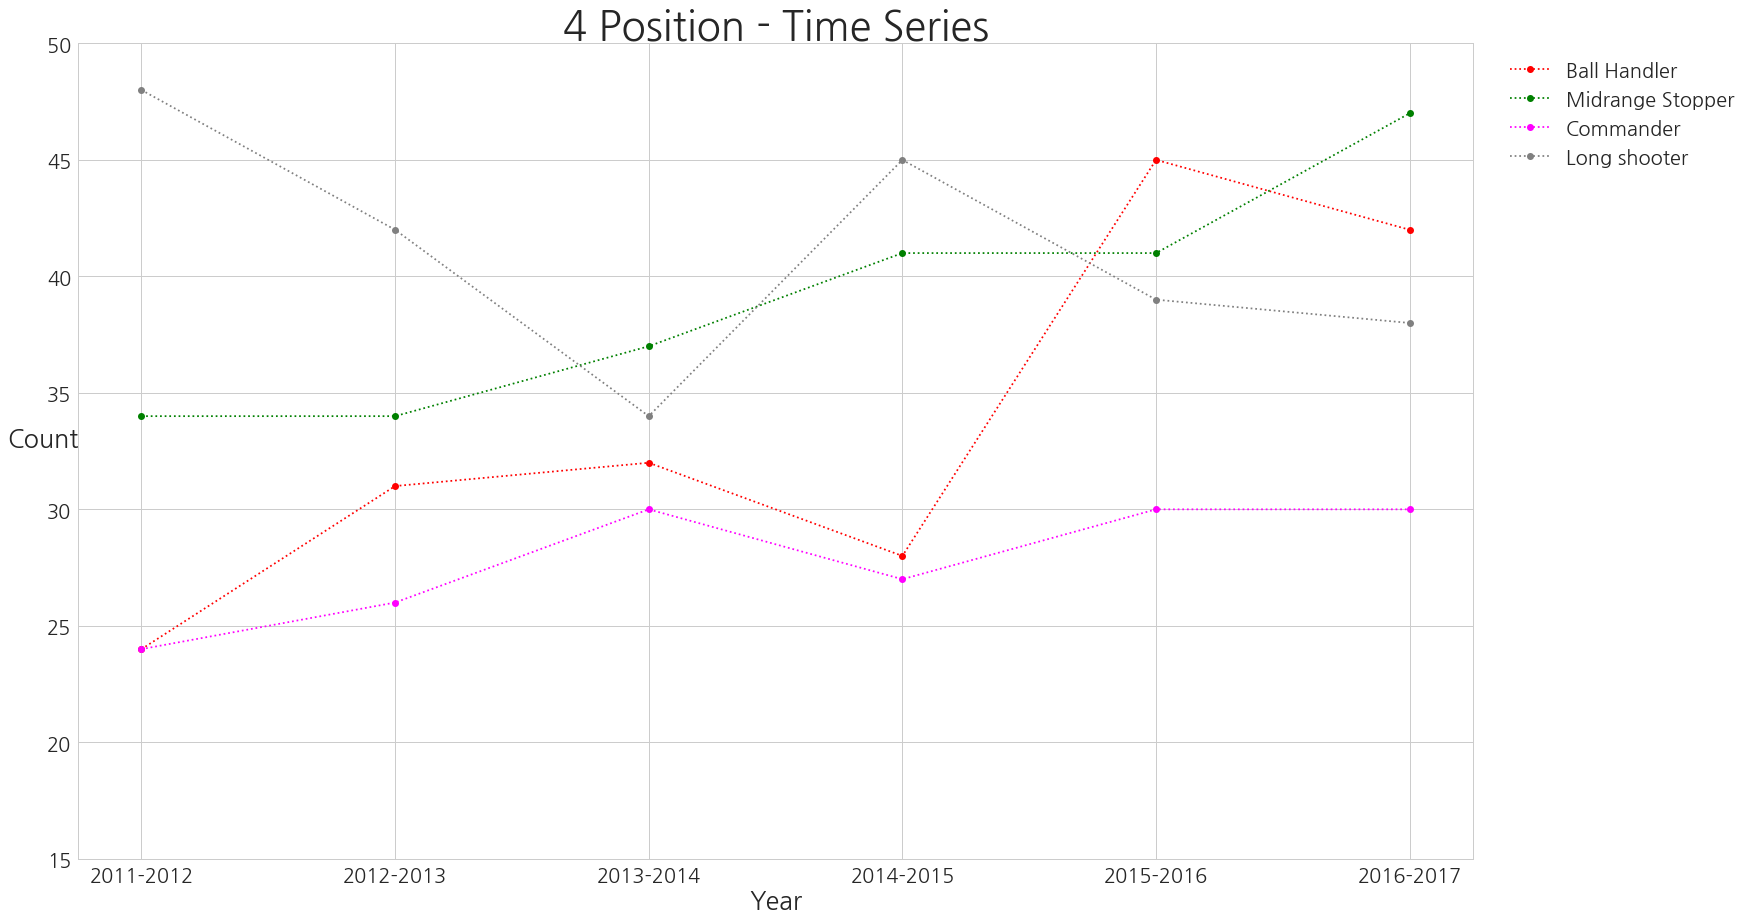

1. **Ball Handler** 같은 경우는 **본인이 득점을 만들어서** 하는 선수이므로, 팀 플레이시 걸리는 시간보다는 본인이 기회를 창출하는 시간이 덜 걸리므로 **빠른 공격**을 위해 필요한 선수이므로 **증가**하는 추세가 나타났다.(기존 포지션에서는 **SG** 포지션)<br />
<br />
2. **Midrange Stopper**의 경우에는 **중거리 슛**이 특화된 선수이며, 골밑에 득점기회를 얻기 위한 시간보다는 **중거리 슛**을 쏘는 것이 **시간이 짧기** 때문에 **증가**하는 추세가 나타났다.(기존 포지션에서는 **F,C** 포지션)<br />
<br />
3. **Commander**의 경우에는 급격한 증가 추세가 나타나는 것은아니지만, **빠른 공격을 위해서 조율**을 하는 사람이 필요하고 또는 그런 기회를 만들지 못할 경우에 **본인이 메이드**를 시켜야 하기 때문에 **증가**하는 추세가 나타났다.(기존 포지션에서는 **PG** 포지션)<br />
<br />
4. **Long shooter**의 경우에는 주로 **3점 등의 외곽** 공격을 많이 펼치는 선수인데, **외곽 슈터가 따로 정해져 있지 않는 Small ball** 흐름에서는 슈터의 **감소**추세가 나타났다.(기존 포지션에서는 **SG** 포지션)

## 3) case 3 : 선수랭크와 포지션조합(3명의 선수)로 득점 등급 예측

### (1) 모델의 소개 및 목적
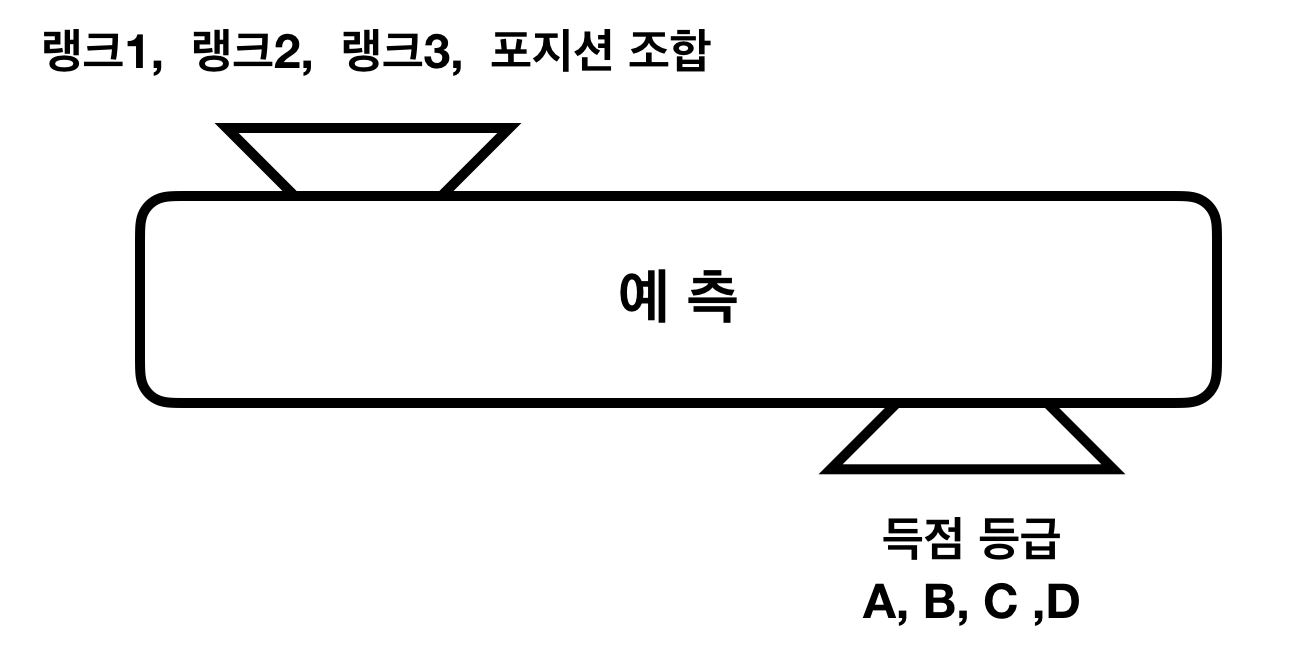

- 농구는 다른 여느 스포츠보다 **팀플레이의 중요성**이 강조되는 스포츠이다. NBA에서는 개인기 위주의 팀보다는 **조직력**을 바탕으로 하는 팀들이 강세를 보이고 있다. 트렌드에 맞춰, **선수 개개인의 능력과 선수들의 포지션 조합**이 **득점에 주는 영향**을 예측하기 위해 이번 모델링을 하게 되었다.

### (2) 데이터 가공

클러스터 속성 분석 데이터 프레임에 음수가 있는 경우, 점수 계산이 제대로 되지 않으므로 10을 더해줘서 음수를 없앤다


In [73]:
std_score = std_score + 10

In [81]:
std_score

Games  Above the Break 3-Usage  Mid-Range-Usage  \
cluster                                                        
0        10.024799                 8.978620         9.250689   
1        10.055659                10.574064        10.068064   
2        10.145902                10.579356        10.161801   
3         9.992075                 9.763087        10.271447   
4         9.938759                10.557641        10.193721   
5         9.889957                10.439906        10.100743   
6         9.990260                 9.114552        10.175119   
7        10.047845                10.534233         9.973311   
8         9.919039                 9.071076         9.814312   
9        10.023229                10.266986         9.962909   

         In The Paint (Non-RA)-Usage  Restricted Area-Usage  \
cluster                                                       
0                          11.206212              11.269559   
1                           9.527565               9.471194   
2                           9.905831               9.523724   
3                          10.058396              10.080510   
4                           9.689198               9.498697   
5                           9.631148               9.594034   
6                          10.606973              10.621686   
7                           9.317835               9.422236   
8                          10.739073              10.911755   
9                           9.576776               9.766127   

         Right Corner 3-Usage  Left Corner 3-Usage  Backcourt-Usage  \
cluster                                                               
0                    9.201316             9.189453         9.609302   
1                   10.484274            10.512561        10.218821   
2                    9.731266             9.790512        10.468687   
3                    9.681151             9.667891         9.803229   
4                   10.004457            10.048997        10.553684   
5                   10.298258            10.292854        10.147345   
6                    9.267285             9.260229         9.616622   
7                   11.142484            11.093072         9.936208   
8                    9.235108             9.227543         9.798748   
9                   10.575240            10.558653         9.913565   

         Above the Break 3 %  Mid-Range %  In The Paint (Non-RA) %  \
cluster                                                              
0                   8.844239     9.554822                10.202157   
1                  10.475942    10.130651                 9.929731   
2                  10.491258    10.380423                10.170977   
3                  10.030503    10.025649                 9.994616   
4                  10.415426    10.211671                10.012782   
5                  10.408171    10.016895                 9.971491   
6                   9.233464     9.982952                10.145701   
7                  10.494083    10.051941                 9.776914   
8                   9.099737     9.722176                10.048325   
9                  10.347122     9.958432                 9.857408   

         Restricted Area %  Right Corner 3 %  Left Corner 3 %  Backcourt %  \
cluster                                                                      
0                10.375908          8.947148         8.927553     9.927914   
1                 9.801645         10.589545        10.511976    10.081747   
2                 9.514956         10.248413        10.416785    10.060691   
3                10.158733          9.942262         9.946302     9.924643   
4                 9.406207         10.324120        10.422620    10.053323   
5                 9.816322         10.372307        10.330873    10.019056   
6                10.351465          9.219680         9.238791     9.970515   
7                10.126618         10.607400        10.520508     9.998830   
8            

### 해당 포지션의 주요 스탯
- 클러스터에 높은 값을 가진 feature 5가지 조합

In [75]:
good[2] = ['Ast', 'Pts', 'Triple Doubles', 'Double Doubles', '3FG%']

In [89]:
pd.DataFrame(std_score.iloc[2,:]).T[good[2]]

Ast        Pts  Triple Doubles  Double Doubles       3FG%
2  12.018886  10.342797       10.201917       10.353107  10.404885

In [97]:
dfX[dfX["Player"]=="Stephen Curry"].head(1)[['Ast', 'Pts', 'Triple Doubles', 'Double Doubles', '3FG%']]

Ast       Pts  Triple Doubles  Double Doubles      3FG%
12  2.364405  3.551294         2.10559        0.856235  0.826797

### 기본 스탯
- 기존에 있던 주요 스탯 : basic stats

In [76]:
# ["Min",  "Pts", "Ast", "OReb", "DReb", "Stl", "Blk, "Plus/Minus Per Game"]
common[2] = ["Min",  "OReb", "Dreb",  "Stl", "Blk", "Plus/Minus Per Game"]

In [88]:
pd.DataFrame(std_score.iloc[2,:]).T[common[2]]

Min      OReb      Dreb        Stl       Blk  Plus/Minus Per Game
2  10.475767  9.253168  9.565007  10.831787  9.362086            10.188397

In [96]:
dfX[dfX["Player"]=="Stephen Curry"].head(1)[["Min",  "OReb", "Dreb",  "Stl", "Blk", "Plus/Minus Per Game"]]

Min      OReb      Dreb       Stl       Blk  Plus/Minus Per Game
12  1.165532 -0.347178  0.859174  3.147566 -0.584123             4.441881

주요 속성 점수 : 클러스터 주요 스탯의 평균과 일치하는 선수의 기록을 내적한 값

기본 속성 점수 : 클러스터 내에서의 일반 속성의 평균과 일치하는 선수의 기록을 내적한 값 

종합 점수 = (주요 속성 점수 * 1.5) + 기본 속성 점수

In [79]:
dfX["score"] = point

### 연도, 포지션별 랭킹 

In [74]:
rank = []
for i in range(10):
        rank.append(dfX[dfX["cluster"]==i][["Player", "Season", "score"]].sort_values(by="score", ascending=False))

In [75]:
season = np.unique(rank[0]["Season"])

In [77]:
for i in range(len(season)):
    for j in range(10):
        if season[i] == "2016-2017":
            print("               " + season[i] )
            print("      " + str(j) + " cluster player ranking ")
            print("-------------------------------------")
            print(rank[j][rank[j]["Season"]==season[i]][["Player", "score"]].sort_values(by="score", ascending=False).head(5))
            print("")
            print("")

               2016-2017
      0 cluster player ranking 
-------------------------------------
                Player       score
1492       Rudy Gobert  326.679950
1870    DeAndre Jordan  288.151521
890   Hassan Whiteside  249.402856
1630     Dwight Howard  247.760929
1612    Andre Drummond  200.551261


               2016-2017
      1 cluster player ranking 
-------------------------------------
            Player       score
20    James Harden  605.733140
76    LeBron James  410.399720
157   Jimmy Butler  184.297259
52   DeMar DeRozan   86.769000
189   Bradley Beal   84.018474


               2016-2017
      2 cluster player ranking 
-------------------------------------
             Player       score
185       John Wall  239.321579
724      Chris Paul  210.990454
107   Stephen Curry  178.050429
1851  Elfrid Payton  174.966069
231      Kyle Lowry  161.065207


               2016-2017
      3 cluster player ranking 
-------------------------------------
                 Player   

###  라인업 데이터 
- nba.com에서 line up 별 자료를 참고한다.


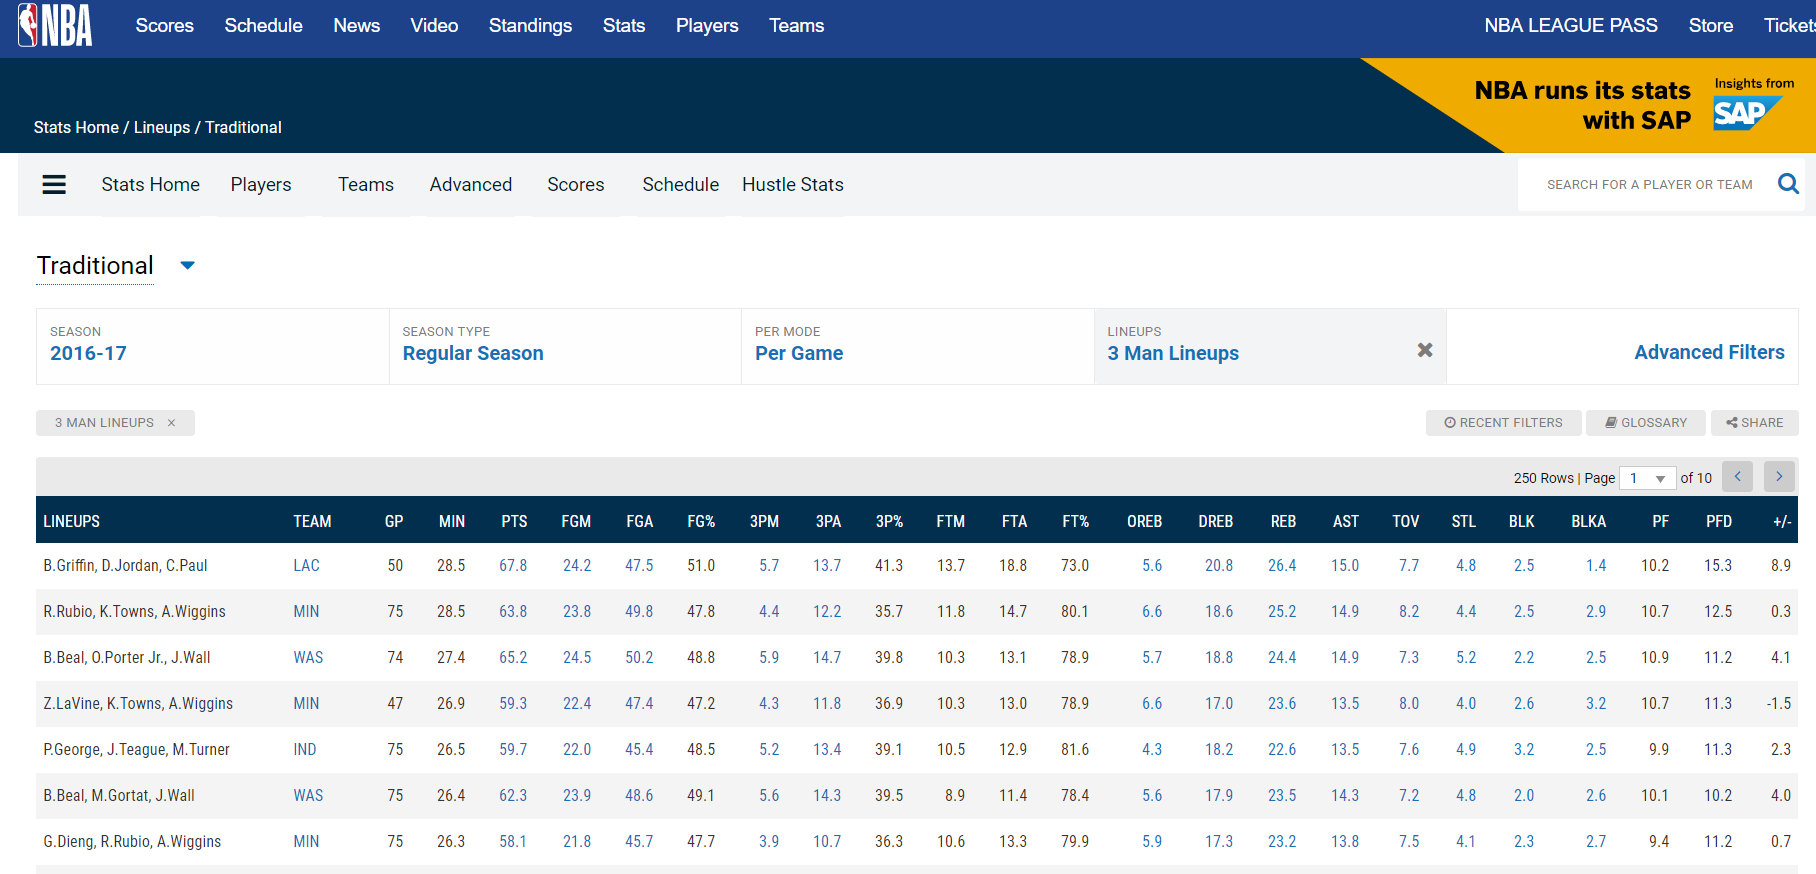

In [5]:
lineup.shape

(2186, 18)

In [6]:
lineup.head()

player1     player2    player3 TEAM     Season   PTS   REB   AST  STL  \
0    R.Allen   K.Garnett   P.Pierce  BOS  2007-2008  56.4  23.4  13.3  4.7   
1  K.Garnett    P.Pierce    R.Rondo  BOS  2007-2008  52.3  22.0  12.5  4.5   
2  K.Garnett   K.Perkins   P.Pierce  BOS  2007-2008  44.2  18.7  10.7  3.9   
3  K.Garnett   K.Perkins    R.Rondo  BOS  2007-2008  43.1  18.3  10.7  3.6   
4    R.Allen    P.Pierce    R.Rondo  BOS  2007-2008  54.4  22.5  12.8  4.5   

   BLK  +/-  score1  score2  score3  cluster1  cluster2  cluster3 combination  
0  2.9  8.2     6.0     3.0     3.0         1         8         5   [1, 5, 8]  
1  2.5  7.6     3.0     3.0     9.0         8         5         4   [4, 5, 8]  
2  2.5  7.5     3.0    17.0     3.0         8         0         5   [0, 5, 8]  
3  2.2  7.4     3.0    17.0     9.0         8         0         4   [0, 4, 8]  
4  2.6  7.3     6.0     3.0     9.0         1         5         4   [1, 4, 5]

----

### (3) 딥러닝

### PTS 등급 처리 

백분위수를 활용해  PTS를 4개의 동일한 크기의 등급으로 나눈다. 

In [ ]:
np.percentile(lineup["PTS"], [0, 20, 40 ,60, 100])

In [8]:
bins = [ 14.5,  28.6,  34.1,  39.6,  68.6]
labels = [0, 1, 2, 3]
cats = pd.cut(lineup["PTS"], bins, labels=labels)

In [9]:
rank = cats

----

### 포지션 조합 변수는 카테고리 변수이므로 더미변수로 바꾼다 

In [10]:
lineup.head()

player1     player2    player3 TEAM     Season   PTS   REB   AST  STL  \
0    R.Allen   K.Garnett   P.Pierce  BOS  2007-2008  56.4  23.4  13.3  4.7   
1  K.Garnett    P.Pierce    R.Rondo  BOS  2007-2008  52.3  22.0  12.5  4.5   
2  K.Garnett   K.Perkins   P.Pierce  BOS  2007-2008  44.2  18.7  10.7  3.9   
3  K.Garnett   K.Perkins    R.Rondo  BOS  2007-2008  43.1  18.3  10.7  3.6   
4    R.Allen    P.Pierce    R.Rondo  BOS  2007-2008  54.4  22.5  12.8  4.5   

   BLK  +/-  score1  score2  score3  cluster1  cluster2  cluster3 combination  
0  2.9  8.2     6.0     3.0     3.0         1         8         5   [1, 5, 8]  
1  2.5  7.6     3.0     3.0     9.0         8         5         4   [4, 5, 8]  
2  2.5  7.5     3.0    17.0     3.0         8         0         5   [0, 5, 8]  
3  2.2  7.4     3.0    17.0     9.0         8         0         4   [0, 4, 8]  
4  2.6  7.3     6.0     3.0     9.0         1         5         4   [1, 4, 5]

In [11]:
lineup2 = lineup[["score1", "score2", "score3"]]
combination = lineup[["cluster1", "cluster2", "cluster3"]]

In [12]:
dummy = pd.get_dummies(lineup.combination, prefix="comb")

In [13]:
lineup3 = pd.concat([lineup2, dummy], axis=1)
lineup3.head()

score1  score2  score3  comb_[0, 0, 2]  comb_[0, 0, 4]  comb_[0, 0, 5]  \
0     6.0     3.0     3.0               0               0               0   
1     3.0     3.0     9.0               0               0               0   
2     3.0    17.0     3.0               0               0               0   
3     3.0    17.0     9.0               0               0               0   
4     6.0     3.0     9.0               0               0               0   

   comb_[0, 0, 7]  comb_[0, 0, 9]  comb_[0, 1, 1]  comb_[0, 1, 2]  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

        ...        comb_[6, 8, 9]  comb_[6, 9, 9]  comb_[7, 7, 8]  \
0       ...                     0               0               0   
1       ...                     0               0               0   
2       ...                     0               0               0   
3       ...                     0               0               0   
4       ...                     0               0               0   

   comb_[7, 7, 9]  comb_[7, 8, 8]  comb_[7, 8, 9]  comb_[7, 9, 9]  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   comb_[8, 8, 9]  comb_[8, 9, 9]  comb_[9, 9, 9]  
0               0               0               0  
1               0               0               0  
2               0               0               0  
3               0               0               0  
4               0               0               0  

[5 rows x 182 columns]

----- 

### 모델 빌드업

In [36]:
from keras.utils import np_utils 
from sklearn.model_selection import train_test_split

X0 = lineup3
target = rank
y0 = np_utils.to_categorical(target, 2)

X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.1, random_state=1)

In [37]:
X_train.shape

(1967, 182)

In [38]:
y_train.shape

(1967, 2)

In [39]:
X_test.shape

(219, 182)

In [40]:
y_test.shape

(219, 2)

In [783]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD
from keras import regularizers

np.random.seed(0)

model = Sequential()
model.add(Dense(182, input_dim=182, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(182, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='sigmoid'))
model.compile(optimizer="Sgd", loss='categorical_crossentropy', metrics=["accuracy"])

In [784]:
%%time
hist = model.fit(np.array(X_train), np.array(y_train), nb_epoch=1500, batch_size=50, 
                 validation_data=(np.array(X_test), np.array(y_test)),  verbose=2)

Train on 1967 samples, validate on 219 samples
Epoch 1/1500
1s - loss: 1.3775 - acc: 0.3701 - val_loss: 1.3564 - val_acc: 0.3516
Epoch 2/1500
0s - loss: 1.3490 - acc: 0.4026 - val_loss: 1.3549 - val_acc: 0.3516
Epoch 3/1500
0s - loss: 1.3435 - acc: 0.4032 - val_loss: 1.3517 - val_acc: 0.3516
Epoch 4/1500
0s - loss: 1.3404 - acc: 0.4026 - val_loss: 1.3510 - val_acc: 0.3516
Epoch 5/1500
0s - loss: 1.3426 - acc: 0.4032 - val_loss: 1.3472 - val_acc: 0.3516
Epoch 6/1500
0s - loss: 1.3390 - acc: 0.4032 - val_loss: 1.3449 - val_acc: 0.3516
Epoch 7/1500
0s - loss: 1.3336 - acc: 0.4032 - val_loss: 1.3407 - val_acc: 0.3516
Epoch 8/1500
0s - loss: 1.3319 - acc: 0.4032 - val_loss: 1.3463 - val_acc: 0.3516
Epoch 9/1500
0s - loss: 1.3332 - acc: 0.4032 - val_loss: 1.3466 - val_acc: 0.3516
Epoch 10/1500
0s - loss: 1.3293 - acc: 0.4032 - val_loss: 1.3393 - val_acc: 0.3516
Epoch 11/1500
0s - loss: 1.3324 - acc: 0.4032 - val_loss: 1.3374 - val_acc: 0.3516
Epoch 12/1500
0s - loss: 1.3332 - acc: 0.4032 - v

0s - loss: 1.2895 - acc: 0.4032 - val_loss: 1.3189 - val_acc: 0.3516
Epoch 101/1500
0s - loss: 1.2839 - acc: 0.4032 - val_loss: 1.3166 - val_acc: 0.3516
Epoch 102/1500
0s - loss: 1.2869 - acc: 0.4032 - val_loss: 1.3243 - val_acc: 0.3516
Epoch 103/1500
0s - loss: 1.2926 - acc: 0.4032 - val_loss: 1.3211 - val_acc: 0.3516
Epoch 104/1500
0s - loss: 1.2917 - acc: 0.4032 - val_loss: 1.3172 - val_acc: 0.3516
Epoch 105/1500
0s - loss: 1.2822 - acc: 0.4032 - val_loss: 1.3239 - val_acc: 0.3516
Epoch 106/1500
0s - loss: 1.2865 - acc: 0.4032 - val_loss: 1.3182 - val_acc: 0.3516
Epoch 107/1500
0s - loss: 1.2840 - acc: 0.4032 - val_loss: 1.3175 - val_acc: 0.3516
Epoch 108/1500
0s - loss: 1.2867 - acc: 0.4032 - val_loss: 1.3120 - val_acc: 0.3516
Epoch 109/1500
0s - loss: 1.2829 - acc: 0.4032 - val_loss: 1.3106 - val_acc: 0.3516
Epoch 110/1500
0s - loss: 1.2856 - acc: 0.4032 - val_loss: 1.3128 - val_acc: 0.3516
Epoch 111/1500
0s - loss: 1.2858 - acc: 0.4032 - val_loss: 1.3188 - val_acc: 0.3516
Epoch 1

0s - loss: 1.2392 - acc: 0.4032 - val_loss: 1.2830 - val_acc: 0.3516
Epoch 200/1500
0s - loss: 1.2384 - acc: 0.4032 - val_loss: 1.2832 - val_acc: 0.3516
Epoch 201/1500
0s - loss: 1.2384 - acc: 0.4032 - val_loss: 1.2798 - val_acc: 0.3516
Epoch 202/1500
0s - loss: 1.2410 - acc: 0.4032 - val_loss: 1.2811 - val_acc: 0.3516
Epoch 203/1500
0s - loss: 1.2412 - acc: 0.4032 - val_loss: 1.2839 - val_acc: 0.3516
Epoch 204/1500
0s - loss: 1.2378 - acc: 0.4032 - val_loss: 1.2803 - val_acc: 0.3516
Epoch 205/1500
0s - loss: 1.2395 - acc: 0.4032 - val_loss: 1.2766 - val_acc: 0.3516
Epoch 206/1500
0s - loss: 1.2401 - acc: 0.4032 - val_loss: 1.2841 - val_acc: 0.3516
Epoch 207/1500
0s - loss: 1.2360 - acc: 0.4032 - val_loss: 1.2782 - val_acc: 0.3516
Epoch 208/1500
0s - loss: 1.2364 - acc: 0.4032 - val_loss: 1.2793 - val_acc: 0.3516
Epoch 209/1500
0s - loss: 1.2338 - acc: 0.4032 - val_loss: 1.2797 - val_acc: 0.3516
Epoch 210/1500
0s - loss: 1.2326 - acc: 0.4032 - val_loss: 1.2804 - val_acc: 0.3516
Epoch 2

0s - loss: 1.2215 - acc: 0.4032 - val_loss: 1.3029 - val_acc: 0.3516
Epoch 298/1500
0s - loss: 1.2226 - acc: 0.4037 - val_loss: 1.2774 - val_acc: 0.3516
Epoch 299/1500
0s - loss: 1.2215 - acc: 0.4032 - val_loss: 1.2829 - val_acc: 0.3516
Epoch 300/1500
0s - loss: 1.2213 - acc: 0.4032 - val_loss: 1.2740 - val_acc: 0.3516
Epoch 301/1500
0s - loss: 1.2222 - acc: 0.4032 - val_loss: 1.2942 - val_acc: 0.3516
Epoch 302/1500
0s - loss: 1.2235 - acc: 0.4026 - val_loss: 1.2748 - val_acc: 0.3516
Epoch 303/1500
0s - loss: 1.2226 - acc: 0.4042 - val_loss: 1.2764 - val_acc: 0.3516
Epoch 304/1500
0s - loss: 1.2210 - acc: 0.4032 - val_loss: 1.2758 - val_acc: 0.3516
Epoch 305/1500
0s - loss: 1.2216 - acc: 0.4032 - val_loss: 1.2799 - val_acc: 0.3516
Epoch 306/1500
0s - loss: 1.2175 - acc: 0.4032 - val_loss: 1.2890 - val_acc: 0.3516
Epoch 307/1500
0s - loss: 1.2235 - acc: 0.4037 - val_loss: 1.2721 - val_acc: 0.3516
Epoch 308/1500
0s - loss: 1.2207 - acc: 0.4032 - val_loss: 1.2751 - val_acc: 0.3516
Epoch 3

0s - loss: 1.2098 - acc: 0.4067 - val_loss: 1.2733 - val_acc: 0.3562
Epoch 396/1500
0s - loss: 1.2135 - acc: 0.4072 - val_loss: 1.2764 - val_acc: 0.3607
Epoch 397/1500
0s - loss: 1.2102 - acc: 0.4093 - val_loss: 1.2858 - val_acc: 0.3562
Epoch 398/1500
0s - loss: 1.2108 - acc: 0.4062 - val_loss: 1.2829 - val_acc: 0.3562
Epoch 399/1500
0s - loss: 1.2123 - acc: 0.4042 - val_loss: 1.2726 - val_acc: 0.3562
Epoch 400/1500
0s - loss: 1.2111 - acc: 0.4072 - val_loss: 1.2760 - val_acc: 0.3607
Epoch 401/1500
0s - loss: 1.2111 - acc: 0.4082 - val_loss: 1.2827 - val_acc: 0.3607
Epoch 402/1500
0s - loss: 1.2127 - acc: 0.4077 - val_loss: 1.2844 - val_acc: 0.3562
Epoch 403/1500
0s - loss: 1.2099 - acc: 0.4087 - val_loss: 1.2877 - val_acc: 0.3607
Epoch 404/1500
0s - loss: 1.2108 - acc: 0.4087 - val_loss: 1.2883 - val_acc: 0.3562
Epoch 405/1500
0s - loss: 1.2122 - acc: 0.4082 - val_loss: 1.3219 - val_acc: 0.3562
Epoch 406/1500
0s - loss: 1.2159 - acc: 0.4062 - val_loss: 1.2714 - val_acc: 0.3607
Epoch 4

0s - loss: 1.1875 - acc: 0.4586 - val_loss: 1.2549 - val_acc: 0.4201
Epoch 494/1500
0s - loss: 1.1861 - acc: 0.4601 - val_loss: 1.2488 - val_acc: 0.4201
Epoch 495/1500
0s - loss: 1.1824 - acc: 0.4703 - val_loss: 1.2581 - val_acc: 0.4247
Epoch 496/1500
0s - loss: 1.1805 - acc: 0.4652 - val_loss: 1.3037 - val_acc: 0.4201
Epoch 497/1500
0s - loss: 1.1862 - acc: 0.4575 - val_loss: 1.2470 - val_acc: 0.4292
Epoch 498/1500
0s - loss: 1.1865 - acc: 0.4637 - val_loss: 1.2645 - val_acc: 0.4247
Epoch 499/1500
0s - loss: 1.1928 - acc: 0.4591 - val_loss: 1.2486 - val_acc: 0.4110
Epoch 500/1500
0s - loss: 1.1840 - acc: 0.4611 - val_loss: 1.2718 - val_acc: 0.4247
Epoch 501/1500
0s - loss: 1.1851 - acc: 0.4616 - val_loss: 1.2445 - val_acc: 0.4338
Epoch 502/1500
0s - loss: 1.1822 - acc: 0.4570 - val_loss: 1.2497 - val_acc: 0.4110
Epoch 503/1500
0s - loss: 1.1814 - acc: 0.4626 - val_loss: 1.2774 - val_acc: 0.4155
Epoch 504/1500
0s - loss: 1.1872 - acc: 0.4647 - val_loss: 1.2579 - val_acc: 0.4201
Epoch 5

0s - loss: 1.1806 - acc: 0.4647 - val_loss: 1.2488 - val_acc: 0.4338
Epoch 593/1500
0s - loss: 1.1694 - acc: 0.4692 - val_loss: 1.2738 - val_acc: 0.3973
Epoch 594/1500
0s - loss: 1.1741 - acc: 0.4596 - val_loss: 1.2583 - val_acc: 0.4292
Epoch 595/1500
0s - loss: 1.1718 - acc: 0.4616 - val_loss: 1.2479 - val_acc: 0.4521
Epoch 596/1500
0s - loss: 1.1691 - acc: 0.4687 - val_loss: 1.2580 - val_acc: 0.4384
Epoch 597/1500
0s - loss: 1.1710 - acc: 0.4687 - val_loss: 1.3644 - val_acc: 0.4155
Epoch 598/1500
0s - loss: 1.1740 - acc: 0.4596 - val_loss: 1.3102 - val_acc: 0.4155
Epoch 599/1500
0s - loss: 1.1685 - acc: 0.4809 - val_loss: 1.2599 - val_acc: 0.4064
Epoch 600/1500
0s - loss: 1.1640 - acc: 0.4672 - val_loss: 1.2831 - val_acc: 0.4201
Epoch 601/1500
0s - loss: 1.1743 - acc: 0.4708 - val_loss: 1.2939 - val_acc: 0.4247
Epoch 602/1500
0s - loss: 1.1693 - acc: 0.4733 - val_loss: 1.2536 - val_acc: 0.4110
Epoch 603/1500
0s - loss: 1.1681 - acc: 0.4698 - val_loss: 1.2785 - val_acc: 0.4201
Epoch 6

0s - loss: 1.1556 - acc: 0.4870 - val_loss: 1.2954 - val_acc: 0.4110
Epoch 692/1500
0s - loss: 1.1522 - acc: 0.4809 - val_loss: 1.2570 - val_acc: 0.4155
Epoch 693/1500
0s - loss: 1.1509 - acc: 0.4804 - val_loss: 1.2605 - val_acc: 0.4201
Epoch 694/1500
0s - loss: 1.1551 - acc: 0.4733 - val_loss: 1.3322 - val_acc: 0.4201
Epoch 695/1500
0s - loss: 1.1512 - acc: 0.4804 - val_loss: 1.4412 - val_acc: 0.4018
Epoch 696/1500
0s - loss: 1.1637 - acc: 0.4713 - val_loss: 1.3655 - val_acc: 0.4064
Epoch 697/1500
0s - loss: 1.1514 - acc: 0.4743 - val_loss: 1.2633 - val_acc: 0.3927
Epoch 698/1500
0s - loss: 1.1508 - acc: 0.4753 - val_loss: 1.3092 - val_acc: 0.4064
Epoch 699/1500
0s - loss: 1.1584 - acc: 0.4774 - val_loss: 1.2764 - val_acc: 0.3744
Epoch 700/1500
0s - loss: 1.1484 - acc: 0.4794 - val_loss: 1.2666 - val_acc: 0.4292
Epoch 701/1500
0s - loss: 1.1516 - acc: 0.4814 - val_loss: 1.3661 - val_acc: 0.3927
Epoch 702/1500
0s - loss: 1.1591 - acc: 0.4718 - val_loss: 1.2785 - val_acc: 0.3653
Epoch 7

Epoch 789/1500
0s - loss: 1.1426 - acc: 0.4855 - val_loss: 1.2819 - val_acc: 0.4155
Epoch 790/1500
0s - loss: 1.1440 - acc: 0.4764 - val_loss: 1.2764 - val_acc: 0.4247
Epoch 791/1500
0s - loss: 1.1453 - acc: 0.4860 - val_loss: 1.3003 - val_acc: 0.4247
Epoch 792/1500
0s - loss: 1.1489 - acc: 0.4804 - val_loss: 1.3567 - val_acc: 0.4155
Epoch 793/1500
0s - loss: 1.1415 - acc: 0.4845 - val_loss: 1.2915 - val_acc: 0.3973
Epoch 794/1500
0s - loss: 1.1468 - acc: 0.4753 - val_loss: 1.3045 - val_acc: 0.3881
Epoch 795/1500
0s - loss: 1.1372 - acc: 0.4779 - val_loss: 1.2747 - val_acc: 0.4018
Epoch 796/1500
0s - loss: 1.1442 - acc: 0.4865 - val_loss: 1.2775 - val_acc: 0.3973
Epoch 797/1500
0s - loss: 1.1415 - acc: 0.4947 - val_loss: 1.2705 - val_acc: 0.4018
Epoch 798/1500
0s - loss: 1.1387 - acc: 0.4845 - val_loss: 1.2794 - val_acc: 0.4201
Epoch 799/1500
0s - loss: 1.1392 - acc: 0.4947 - val_loss: 1.3506 - val_acc: 0.4018
Epoch 800/1500
0s - loss: 1.1401 - acc: 0.4916 - val_loss: 1.2450 - val_acc:

0s - loss: 1.1243 - acc: 0.4947 - val_loss: 1.2864 - val_acc: 0.4201
Epoch 889/1500
0s - loss: 1.1238 - acc: 0.4916 - val_loss: 1.2751 - val_acc: 0.4064
Epoch 890/1500
0s - loss: 1.1201 - acc: 0.4870 - val_loss: 1.5008 - val_acc: 0.3836
Epoch 891/1500
0s - loss: 1.1261 - acc: 0.4881 - val_loss: 1.2807 - val_acc: 0.3973
Epoch 892/1500
0s - loss: 1.1152 - acc: 0.5003 - val_loss: 1.4881 - val_acc: 0.3744
Epoch 893/1500
0s - loss: 1.1190 - acc: 0.5058 - val_loss: 1.2980 - val_acc: 0.4018
Epoch 894/1500
0s - loss: 1.1216 - acc: 0.4875 - val_loss: 1.2875 - val_acc: 0.4292
Epoch 895/1500
0s - loss: 1.1191 - acc: 0.5048 - val_loss: 1.2907 - val_acc: 0.3973
Epoch 896/1500
0s - loss: 1.1231 - acc: 0.4972 - val_loss: 1.2668 - val_acc: 0.4201
Epoch 897/1500
0s - loss: 1.1188 - acc: 0.4987 - val_loss: 1.2780 - val_acc: 0.3653
Epoch 898/1500
0s - loss: 1.1232 - acc: 0.4926 - val_loss: 1.2788 - val_acc: 0.4201
Epoch 899/1500
0s - loss: 1.1209 - acc: 0.4982 - val_loss: 1.2827 - val_acc: 0.4475
Epoch 9

0s - loss: 1.1048 - acc: 0.5125 - val_loss: 1.2926 - val_acc: 0.4110
Epoch 987/1500
0s - loss: 1.1022 - acc: 0.5099 - val_loss: 1.2904 - val_acc: 0.4110
Epoch 988/1500
0s - loss: 1.1072 - acc: 0.5099 - val_loss: 1.2833 - val_acc: 0.4064
Epoch 989/1500
0s - loss: 1.0989 - acc: 0.5053 - val_loss: 1.2996 - val_acc: 0.3653
Epoch 990/1500
0s - loss: 1.1022 - acc: 0.5053 - val_loss: 1.4410 - val_acc: 0.3836
Epoch 991/1500
0s - loss: 1.1102 - acc: 0.5013 - val_loss: 1.2837 - val_acc: 0.4018
Epoch 992/1500
0s - loss: 1.1042 - acc: 0.5094 - val_loss: 1.2686 - val_acc: 0.4201
Epoch 993/1500
0s - loss: 1.0929 - acc: 0.5180 - val_loss: 1.3456 - val_acc: 0.4018
Epoch 994/1500
0s - loss: 1.1017 - acc: 0.5084 - val_loss: 1.3163 - val_acc: 0.4064
Epoch 995/1500
0s - loss: 1.1094 - acc: 0.4982 - val_loss: 1.3137 - val_acc: 0.3562
Epoch 996/1500
0s - loss: 1.1062 - acc: 0.5094 - val_loss: 1.2738 - val_acc: 0.4384
Epoch 997/1500
0s - loss: 1.0988 - acc: 0.5013 - val_loss: 1.3147 - val_acc: 0.3744
Epoch 9

0s - loss: 1.0764 - acc: 0.5114 - val_loss: 1.4267 - val_acc: 0.3927
Epoch 1084/1500
0s - loss: 1.0886 - acc: 0.5125 - val_loss: 1.3549 - val_acc: 0.3927
Epoch 1085/1500
0s - loss: 1.0800 - acc: 0.5170 - val_loss: 1.5666 - val_acc: 0.3699
Epoch 1086/1500
0s - loss: 1.0866 - acc: 0.5135 - val_loss: 1.3192 - val_acc: 0.4475
Epoch 1087/1500
0s - loss: 1.0865 - acc: 0.5165 - val_loss: 1.2736 - val_acc: 0.4658
Epoch 1088/1500
0s - loss: 1.0778 - acc: 0.5175 - val_loss: 1.2783 - val_acc: 0.3973
Epoch 1089/1500
0s - loss: 1.0726 - acc: 0.5130 - val_loss: 1.3278 - val_acc: 0.3927
Epoch 1090/1500
0s - loss: 1.0834 - acc: 0.5160 - val_loss: 1.5343 - val_acc: 0.3973
Epoch 1091/1500
0s - loss: 1.0784 - acc: 0.5186 - val_loss: 1.5121 - val_acc: 0.4018
Epoch 1092/1500
0s - loss: 1.0832 - acc: 0.5226 - val_loss: 1.3475 - val_acc: 0.4201
Epoch 1093/1500
0s - loss: 1.0891 - acc: 0.5150 - val_loss: 1.2971 - val_acc: 0.4110
Epoch 1094/1500
0s - loss: 1.0822 - acc: 0.5191 - val_loss: 1.3946 - val_acc: 0.3

0s - loss: 1.0586 - acc: 0.5150 - val_loss: 1.3306 - val_acc: 0.3881
Epoch 1181/1500
0s - loss: 1.0673 - acc: 0.5196 - val_loss: 1.3916 - val_acc: 0.4110
Epoch 1182/1500
0s - loss: 1.0609 - acc: 0.5186 - val_loss: 1.3372 - val_acc: 0.4064
Epoch 1183/1500
0s - loss: 1.0646 - acc: 0.5211 - val_loss: 1.3261 - val_acc: 0.4064
Epoch 1184/1500
0s - loss: 1.0659 - acc: 0.5165 - val_loss: 1.3522 - val_acc: 0.3653
Epoch 1185/1500
0s - loss: 1.0553 - acc: 0.5231 - val_loss: 1.2802 - val_acc: 0.3790
Epoch 1186/1500
0s - loss: 1.0620 - acc: 0.5308 - val_loss: 1.2800 - val_acc: 0.4247
Epoch 1187/1500
0s - loss: 1.0683 - acc: 0.5272 - val_loss: 1.3477 - val_acc: 0.4292
Epoch 1188/1500
0s - loss: 1.0696 - acc: 0.5231 - val_loss: 1.3254 - val_acc: 0.3790
Epoch 1189/1500
0s - loss: 1.0506 - acc: 0.5196 - val_loss: 1.3463 - val_acc: 0.3562
Epoch 1190/1500
0s - loss: 1.0476 - acc: 0.5374 - val_loss: 1.3433 - val_acc: 0.4201
Epoch 1191/1500
0s - loss: 1.0462 - acc: 0.5241 - val_loss: 1.2815 - val_acc: 0.4

0s - loss: 1.0410 - acc: 0.5486 - val_loss: 1.3969 - val_acc: 0.4064
Epoch 1279/1500
0s - loss: 1.0362 - acc: 0.5394 - val_loss: 1.3265 - val_acc: 0.3973
Epoch 1280/1500
0s - loss: 1.0345 - acc: 0.5455 - val_loss: 1.3514 - val_acc: 0.4475
Epoch 1281/1500
0s - loss: 1.0462 - acc: 0.5313 - val_loss: 1.3081 - val_acc: 0.3973
Epoch 1282/1500
0s - loss: 1.0355 - acc: 0.5440 - val_loss: 1.3383 - val_acc: 0.4703
Epoch 1283/1500
0s - loss: 1.0412 - acc: 0.5491 - val_loss: 1.4211 - val_acc: 0.4018
Epoch 1284/1500
0s - loss: 1.0380 - acc: 0.5338 - val_loss: 1.5198 - val_acc: 0.4018
Epoch 1285/1500
0s - loss: 1.0416 - acc: 0.5328 - val_loss: 1.5667 - val_acc: 0.3790
Epoch 1286/1500
0s - loss: 1.0268 - acc: 0.5338 - val_loss: 1.3339 - val_acc: 0.4110
Epoch 1287/1500
0s - loss: 1.0355 - acc: 0.5425 - val_loss: 1.4147 - val_acc: 0.3653
Epoch 1288/1500
0s - loss: 1.0501 - acc: 0.5358 - val_loss: 1.3108 - val_acc: 0.4201
Epoch 1289/1500
0s - loss: 1.0085 - acc: 0.5562 - val_loss: 1.3162 - val_acc: 0.4

0s - loss: 1.0182 - acc: 0.5496 - val_loss: 1.6227 - val_acc: 0.3653
Epoch 1376/1500
0s - loss: 1.0177 - acc: 0.5440 - val_loss: 1.3908 - val_acc: 0.3699
Epoch 1377/1500
0s - loss: 1.0099 - acc: 0.5516 - val_loss: 1.3424 - val_acc: 0.4292
Epoch 1378/1500
0s - loss: 1.0141 - acc: 0.5536 - val_loss: 1.3699 - val_acc: 0.3699
Epoch 1379/1500
0s - loss: 1.0176 - acc: 0.5384 - val_loss: 1.3527 - val_acc: 0.4201
Epoch 1380/1500
0s - loss: 1.0051 - acc: 0.5613 - val_loss: 1.5509 - val_acc: 0.3881
Epoch 1381/1500
0s - loss: 1.0163 - acc: 0.5455 - val_loss: 1.5131 - val_acc: 0.3242
Epoch 1382/1500
0s - loss: 1.0135 - acc: 0.5501 - val_loss: 1.4160 - val_acc: 0.3288
Epoch 1383/1500
0s - loss: 1.0251 - acc: 0.5384 - val_loss: 1.3234 - val_acc: 0.4247
Epoch 1384/1500
0s - loss: 1.0061 - acc: 0.5445 - val_loss: 1.4712 - val_acc: 0.3927
Epoch 1385/1500
0s - loss: 1.0121 - acc: 0.5536 - val_loss: 1.4095 - val_acc: 0.3516
Epoch 1386/1500
0s - loss: 1.0194 - acc: 0.5460 - val_loss: 1.3734 - val_acc: 0.4

0s - loss: 0.9786 - acc: 0.5663 - val_loss: 1.4044 - val_acc: 0.3425
Epoch 1474/1500
0s - loss: 0.9821 - acc: 0.5602 - val_loss: 1.5292 - val_acc: 0.3059
Epoch 1475/1500
0s - loss: 0.9825 - acc: 0.5699 - val_loss: 1.4099 - val_acc: 0.4475
Epoch 1476/1500
0s - loss: 0.9998 - acc: 0.5643 - val_loss: 1.3439 - val_acc: 0.3836
Epoch 1477/1500
0s - loss: 1.0021 - acc: 0.5669 - val_loss: 1.3394 - val_acc: 0.3927
Epoch 1478/1500
0s - loss: 0.9921 - acc: 0.5719 - val_loss: 1.4841 - val_acc: 0.3699
Epoch 1479/1500
0s - loss: 0.9975 - acc: 0.5694 - val_loss: 1.3454 - val_acc: 0.4429
Epoch 1480/1500
0s - loss: 0.9640 - acc: 0.5638 - val_loss: 1.4524 - val_acc: 0.3973
Epoch 1481/1500
0s - loss: 0.9937 - acc: 0.5674 - val_loss: 1.4283 - val_acc: 0.4247
Epoch 1482/1500
0s - loss: 0.9772 - acc: 0.5785 - val_loss: 1.3957 - val_acc: 0.3973
Epoch 1483/1500
0s - loss: 0.9975 - acc: 0.5653 - val_loss: 1.4894 - val_acc: 0.3973
Epoch 1484/1500
0s - loss: 0.9908 - acc: 0.5714 - val_loss: 1.7045 - val_acc: 0.3

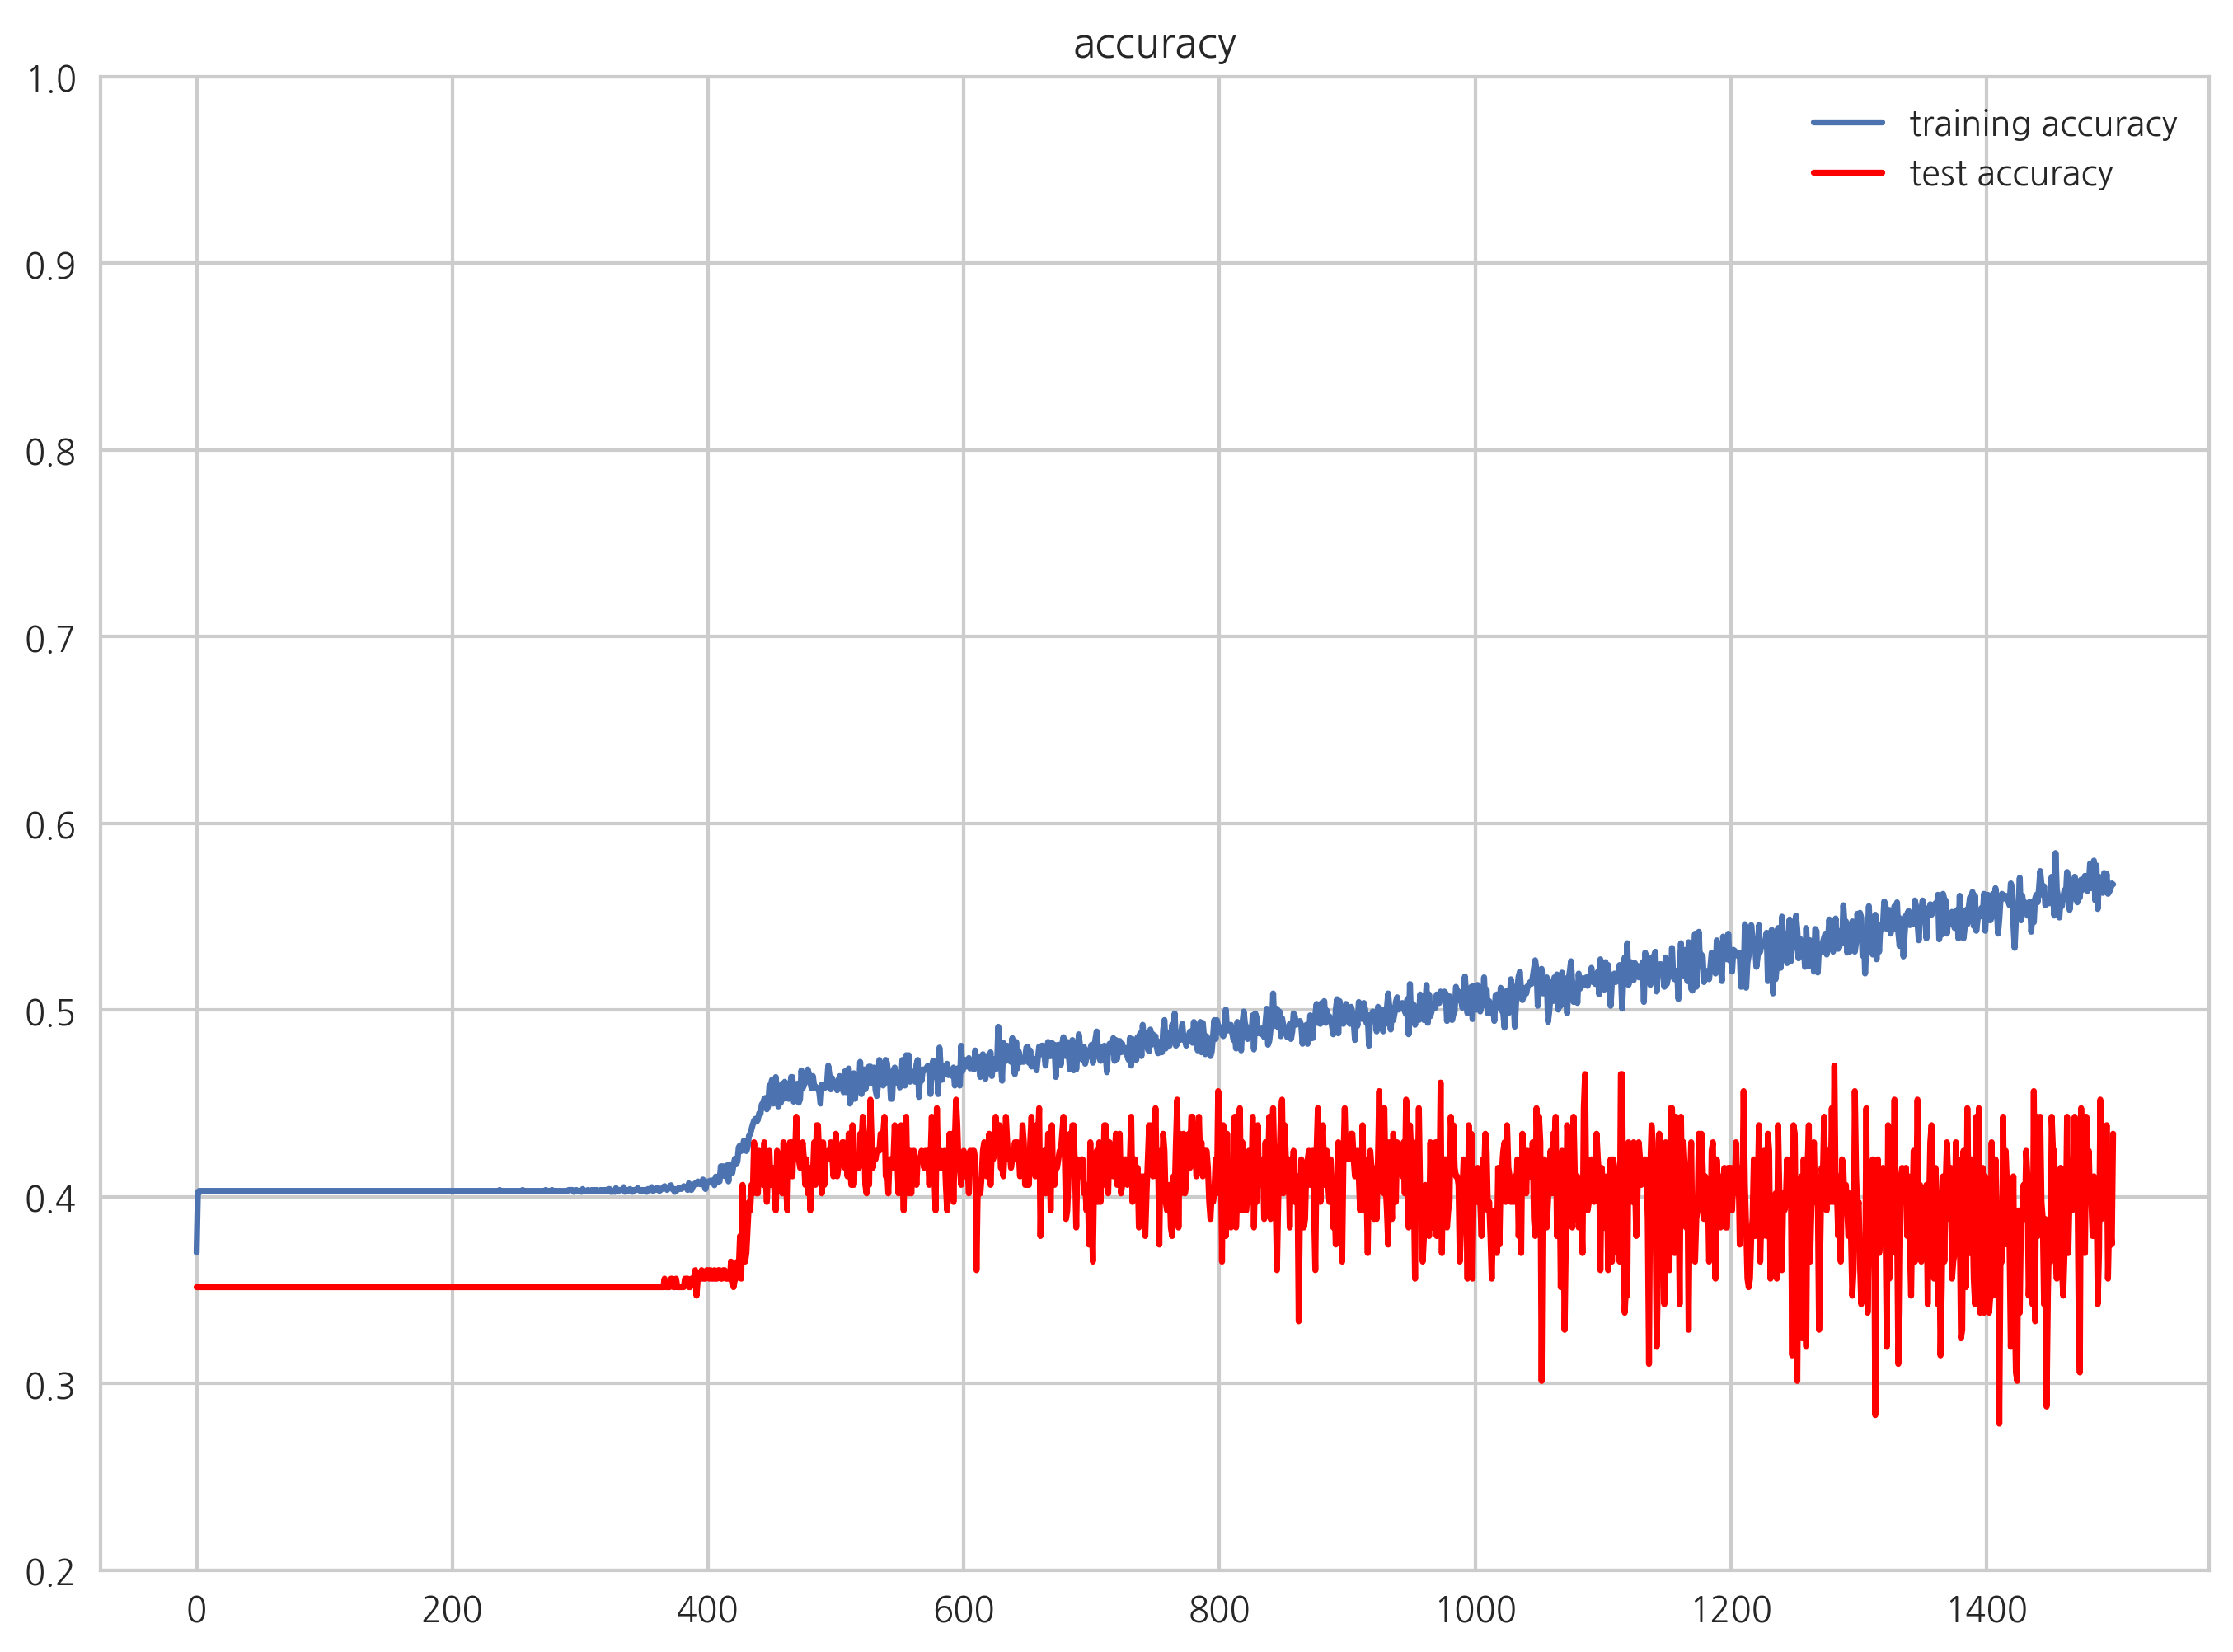

In [785]:
plt.plot(hist.history['acc'], label="training accuracy")
plt.plot(hist.history['val_acc'], label="test accuracy", color="red")
plt.ylim(0.2, 1)
plt.legend()
plt.title("accuracy")
plt.show()

In [788]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict_classes(np.array(X_test), verbose=0)

print("Confusion Matrix")
print("----------------------------------------------------------")
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(cm)

print("")
print("Classification Report")
print("----------------------------------------------------------")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

print("")
print("Test Accuracy")
print("----------------------------------------------------------")
print("Test accuracy =", accuracy_score(np.argmax(y_test, axis=1), y_pred))

Confusion Matrix
----------------------------------------------------------
[[ 8 13  1 20]
 [ 8 21 11 17]
 [ 4 15  6 18]
 [ 1 11  5 60]]

Classification Report
----------------------------------------------------------
             precision    recall  f1-score   support

          0       0.38      0.19      0.25        42
          1       0.35      0.37      0.36        57
          2       0.26      0.14      0.18        43
          3       0.52      0.78      0.62        77

avg / total       0.40      0.43      0.40       219


Test Accuracy
----------------------------------------------------------
Test accuracy = 0.433789954338


----

# 4. Conclusion & further research
### Conclusion

-LDA로 Sample feature에 대해 **차원축소**를 시행한 후, **K-Means 클러스터링**을 이용하여 NBA Position에 대해 기존의 5가지의 분류와는 다른 **새로운 10가지 포지션으로의 분류**를 시행함

-**LDA속성 분석**을 통해, 특정 선수의 **Role 변화**, 전체 리그 흐름 별 **포지션 수요의 변화**, **선수 조합 및 클러스터 내 랭킹을 조합하여 득점 예측** 등을 클러스터링을 통해 알아볼 수 있었음

-딥러닝을 통한 **라인업 별 포지션 조합이 경기에 얼마나 영향을 미치는지**, 선수 조합으로 모델을 작성하여, 나아가 조합에서 한 선수가 빠졌을 시 **대체 선수를 예측**해 봄

### further research
-수비에 관한 구체적인 기록들이 딥러닝 부분에 많이 반영되지 않아 향후 **수비 관련 지표들에 대해 더 추가하여 반영할 필요**가 있음

-**2차 스탯 및 플레이오프 스탯** 등을 반영할 수 있는 더 정교한 모델 및 클러스터링 작업과 추가적 데이터 확보

-**딥러닝 샘플이 부족**하여 결점 발생시 예측 성능을 낮출 수 있어 NBA 관련 데이터를 추가적으로 **대량 확보**하는 것이 필요함 

# 5. References

1. A new perspective on positions in baskerball players using cluster analysis
http://www.sloansportsconference.com/wp-content/uploads/2012/02/44-Lutz_cluster_analysis_NBA.pdf

2. Modern NBA player positions - using Unsupervised clustering to uncover Functional Roles in Basketball도 참고)
https://medium.com/hanman/the-evolution-of-nba-player-positions-using-unsupervised-clustering-to-uncover-functional-roles-a1d07089935c

3. A New Perspective On Positions In Basketball Players Using Cluster Analysis
http://www.academia.edu/28430572/A_New_Perspective_On_Positions_In_Basketball_Players_Using_Cluster_Analysis

4. NBA.com Player, Combination, Team stats
5. NBAminer Player stats
6. http:// Basketball-reference.com